In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
import warnings 
warnings.filterwarnings('ignore')

#    DATA IMPORT

In [5]:
df = pd.read_csv('housing_data.csv')

In [6]:
df

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


# Data Cleaning

In [8]:
df.head(10)

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
5,5,SC50,RL,85,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,No,MnPrv,Shed,700,Oct,2009,WD,Normal,143000
6,6,SC20,RL,75,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,307000
7,7,SC60,RL,0,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,Shed,350,Nov,2009,WD,Normal,200000
8,8,SC50,RM,51,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2008,WD,Abnorml,129900
9,9,SC190,RL,50,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Jan,2008,WD,Normal,118000


In [9]:
df.tail(10)

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1450,SC90,RL,60,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Sep,2009,WD,Normal,136000
1451,1451,SC20,RL,78,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2009,New,Partial,287090
1452,1452,SC180,RM,35,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2006,WD,Normal,145000
1453,1453,SC20,RL,90,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Jul,2006,WD,Abnorml,84500
1454,1454,SC20,FV,62,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,No,No,No,0,Oct,2009,WD,Normal,185000
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125
1459,1459,SC20,RL,75,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Jun,2008,WD,Normal,147500


In [10]:
columns_to_drop = [
    'Unnamed: 0', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 
    'Utilities', 'Street', 'Condition2', 'RoofMatl', 'WoodDeckSF',
    'YrSold', 'MoSold', 'GarageCars', 'TotRmsAbvGrd', 
    '1stFlrSF', '2ndFlrSF', 'SaleType', 'SaleCondition', 
    'PoolArea', '3SsnPorch', 'ScreenPorch', 'EnclosedPorch',
    'PavedDrive','LandSlope','MiscVal','Condition1','GarageYrBlt',
    'FireplaceQu','GarageQual','OpenPorchSF','MSSubClass','LandContour',
    'LotConfig','LotShape','BldgType','Neighborhood','Exterior1st','MSZoning','RoofStyle',
    'Functional','ExterCond', 'Foundation', 'Heating','LowQualFinSF']

df1 = df.drop(columns=columns_to_drop)

In [11]:
df1

,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrType,MasVnrArea,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,GarageCond,SalePrice
0,65,8450,2Story,7,5,2003,2003,VinylSd,BrkFace,196,...,1,3,1,Gd,0,Attchd,RFn,548,TA,208500
1,80,9600,1Story,6,8,1976,1976,MetalSd,NaN,0,...,0,3,1,TA,1,Attchd,RFn,460,TA,181500
2,68,11250,2Story,7,5,2001,2002,VinylSd,BrkFace,162,...,1,3,1,Gd,1,Attchd,RFn,608,TA,223500
3,60,9550,2Story,7,5,1915,1970,Wd Shng,NaN,0,...,0,3,1,Gd,1,Detchd,Unf,642,TA,140000
4,84,14260,2Story,8,5,2000,2000,VinylSd,BrkFace,350,...,1,4,1,Gd,1,Attchd,RFn,836,TA,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62,7917,2Story,6,5,1999,2000,VinylSd,NaN,0,...,1,3,1,TA,1,Attchd,RFn,460,TA,175000
1456,85,13175,1Story,6,6,1978,1988,Plywood,Stone,119,...,0,3,1,TA,2,Attchd,Unf,500,TA,210000
1457,66,9042,2Story,7,9,1941,2006,CmentBd,NaN,0,...,0,4,1,Gd,2,Attchd,RFn,252,TA,266500
1458,68,9717,1Story,5,6,1950,1996,MetalSd,NaN,0,...,0,2,1,Gd,0,Attchd,Unf,240,TA,142125


1.Unnamed: 0 – Just an index, unnecessary.

2.Alley – Often has many missing values (no alley access).

3.PoolQC – Pool quality, but most homes don't have pools.

4.Fence – Fence information, often missing.

5.MiscFeature – Miscellaneous features like sheds, but very sparse.

6.Utilities – Often has the same value (AllPub) across most properties, offering little variation.

7.Street – Most properties are on paved streets, so this may not be informative.

8.Condition2 – Secondary road/railway proximity, rarely differs from Condition1.

9.RoofMatl – Often dominated by one or two materials, offering little variation.

10.YrSold and MoSold – If we're predicting SalePrice, including the sale date might introduce data leakage if we model learns to predict based on market conditions.

11.SaleType and SaleCondition – These might correlate with price but could be considered leakage depending on the modeling goal.

12.PoolArea – If very few houses have pools, it might not be worth including.

13.3SsnPorch, ScreenPorch, EnclosedPorch – These features are uncommon.

14.PavedDrive-If most entries are Y (Yes), this won’t add much value.

15.LandSlope-Typically, most land is flat (Gtl). If there's little variance, this can be dropped.

16.MiscVal-Represents the value of miscellaneous items (like sheds). Usually, this has minimal impact.

17.Condition1-If this doesn't vary much or overlap with neighborhood information, it might not add value.

18.GarageYrBlt-This might strongly correlate with overall house age, but it could be redundant if we're already using YearBuilt.

19.FireplaceQu-Since we have the Fireplaces column (which numerically counts them), the quality (FireplaceQu) might be redundant unless it adds significant predictive power.

20.GarageQual and GarageCond-These often overlap. If the garage quality and garage condition are highly correlated, consider keeping only one.

21.WoodDeckSF and OpenPorchSF-Depending on variance, we might not need both. For instance, if one has many zeros or little variance, it might not contribute much.

22.MSSubClass-Often considered redundant if HouseStyle is retained, as both describe similar aspects of the property type.

23.LandContour-This typically has low variance unless your data shows significant differences in elevation impacting SalePrice.

24.LotConfig-The configuration of the lot (corner, inside, etc.) might not significantly affect the price unless proven otherwise.

25.LotShape-If most properties are regular (Reg), this might have low variance.
BldgType-Depending on diversity in our data (e.g., if most are single-family), this may have limited impact.

26.Neighborhood-If there’s a strong correlation between Neighborhood and SalePrice, keep it; otherwise, consider grouping or simplifying it.

27.Exterior1st-Depending on diversity, this might be simplified or dropped if it doesn’t correlate strongly with SalePrice.

28.MSZoning-If most properties fall under a single zone (like RL for Residential Low-Density), it might have low impact.

29.RoofStyle-If most homes have the same style (like Gable), this might have low variance and minimal effect.

30.Functional-This often defaults to 'Typ' (typical) in most homes. Unless you have a lot of non-typical cases affecting SalePrice, consider dropping.

31.ExterCond, Foundation, and Heating- They might have many unique categories that don’t add predictive value after encoding.

32.LowQualFinSF-(which could be seen as a niche feature) it doesn't have a strong correlation with the target.

33.WoodDeckSF has mostly 0 values

In [13]:
df1.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,0.613014,472.980137,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.644666,213.804841,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,334.500000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,480.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,576.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,3.000000,1418.000000,755000.000000


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotFrontage   1460 non-null   int64 
 1   LotArea       1460 non-null   int64 
 2   HouseStyle    1460 non-null   object
 3   OverallQual   1460 non-null   int64 
 4   OverallCond   1460 non-null   int64 
 5   YearBuilt     1460 non-null   int64 
 6   YearRemodAdd  1460 non-null   int64 
 7   Exterior2nd   1460 non-null   object
 8   MasVnrType    588 non-null    object
 9   MasVnrArea    1460 non-null   int64 
 10  ExterQual     1460 non-null   object
 11  BsmtQual      1460 non-null   object
 12  BsmtCond      1460 non-null   object
 13  BsmtExposure  1460 non-null   object
 14  BsmtFinType1  1460 non-null   object
 15  BsmtFinSF1    1460 non-null   int64 
 16  BsmtFinType2  1460 non-null   object
 17  BsmtFinSF2    1460 non-null   int64 
 18  BsmtUnfSF     1460 non-null   int64 
 19  TotalB

In [15]:
# List of categorical columns
categorical_columns = ['HouseStyle', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 
                       'GarageFinish', 'GarageCond']

# Convert categorical columns to category dtype
for col in categorical_columns:
    df1[col] = df1[col].astype('category')


In [16]:
# Convert year columns to datetime type (if relevant)
df1['YearBuilt'] = pd.to_datetime(df1['YearBuilt'], format='%Y')
df1['YearRemodAdd'] = pd.to_datetime(df1['YearRemodAdd'], format='%Y')


In [17]:
# Convert numeric columns to appropriate types
df1['LotFrontage'] = df1['LotFrontage'].astype('float64')  # In case of NaN values
df1['MasVnrArea'] = df1['MasVnrArea'].astype('int64')
df1['GarageArea'] = df1['GarageArea'].astype('int64')
df1['SalePrice'] = df1['SalePrice'].astype('int64')


# Handle missing values

In [22]:
# Fill missing values with the mode (most frequent value)
df1['MasVnrType'].fillna(df1['MasVnrType'].mode()[0], inplace=True)

In [25]:
# Fill missing values in 'Electrical' column with the mode
df1['Electrical'].fillna(df1['Electrical'].mode()[0], inplace=True)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   LotFrontage   1460 non-null   float64       
 1   LotArea       1460 non-null   int64         
 2   HouseStyle    1460 non-null   category      
 3   OverallQual   1460 non-null   int64         
 4   OverallCond   1460 non-null   int64         
 5   YearBuilt     1460 non-null   datetime64[ns]
 6   YearRemodAdd  1460 non-null   datetime64[ns]
 7   Exterior2nd   1460 non-null   category      
 8   MasVnrType    1460 non-null   category      
 9   MasVnrArea    1460 non-null   int64         
 10  ExterQual     1460 non-null   category      
 11  BsmtQual      1460 non-null   category      
 12  BsmtCond      1460 non-null   category      
 13  BsmtExposure  1460 non-null   category      
 14  BsmtFinType1  1460 non-null   category      
 15  BsmtFinSF1    1460 non-null   int64   

In [34]:
df1.duplicated().sum()

0

In [37]:
df1.isnull().sum()

LotFrontage     0
LotArea         0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
HeatingQC       0
CentralAir      0
Electrical      0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
Fireplaces      0
GarageType      0
GarageFinish    0
GarageArea      0
GarageCond      0
SalePrice       0
dtype: int64

In [39]:
df1.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971-04-08 22:46:01.643835616,1984-11-12 14:16:06.575342464,103.117123,443.639726,46.549315,567.240411,...,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,0.613014,472.980137,180921.195890
min,0.000000,1300.000000,1.000000,1.000000,1872-01-01 00:00:00,1950-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954-01-01 00:00:00,1967-01-01 00:00:00,0.000000,0.000000,0.000000,223.000000,...,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,334.500000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973-01-01 00:00:00,1994-01-01 00:00:00,0.000000,383.500000,0.000000,477.500000,...,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,480.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000-01-01 00:00:00,2004-01-01 00:00:00,164.250000,712.250000,0.000000,808.000000,...,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,576.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010-01-01 00:00:00,2010-01-01 00:00:00,1600.000000,5644.000000,1474.000000,2336.000000,...,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,3.000000,1418.000000,755000.000000
std,34.664304,9981.264932,1.382997,1.112799,NaN,NaN,180.731373,456.098091,161.319273,441.866955,...,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.644666,213.804841,79442.502883


# Box Plot

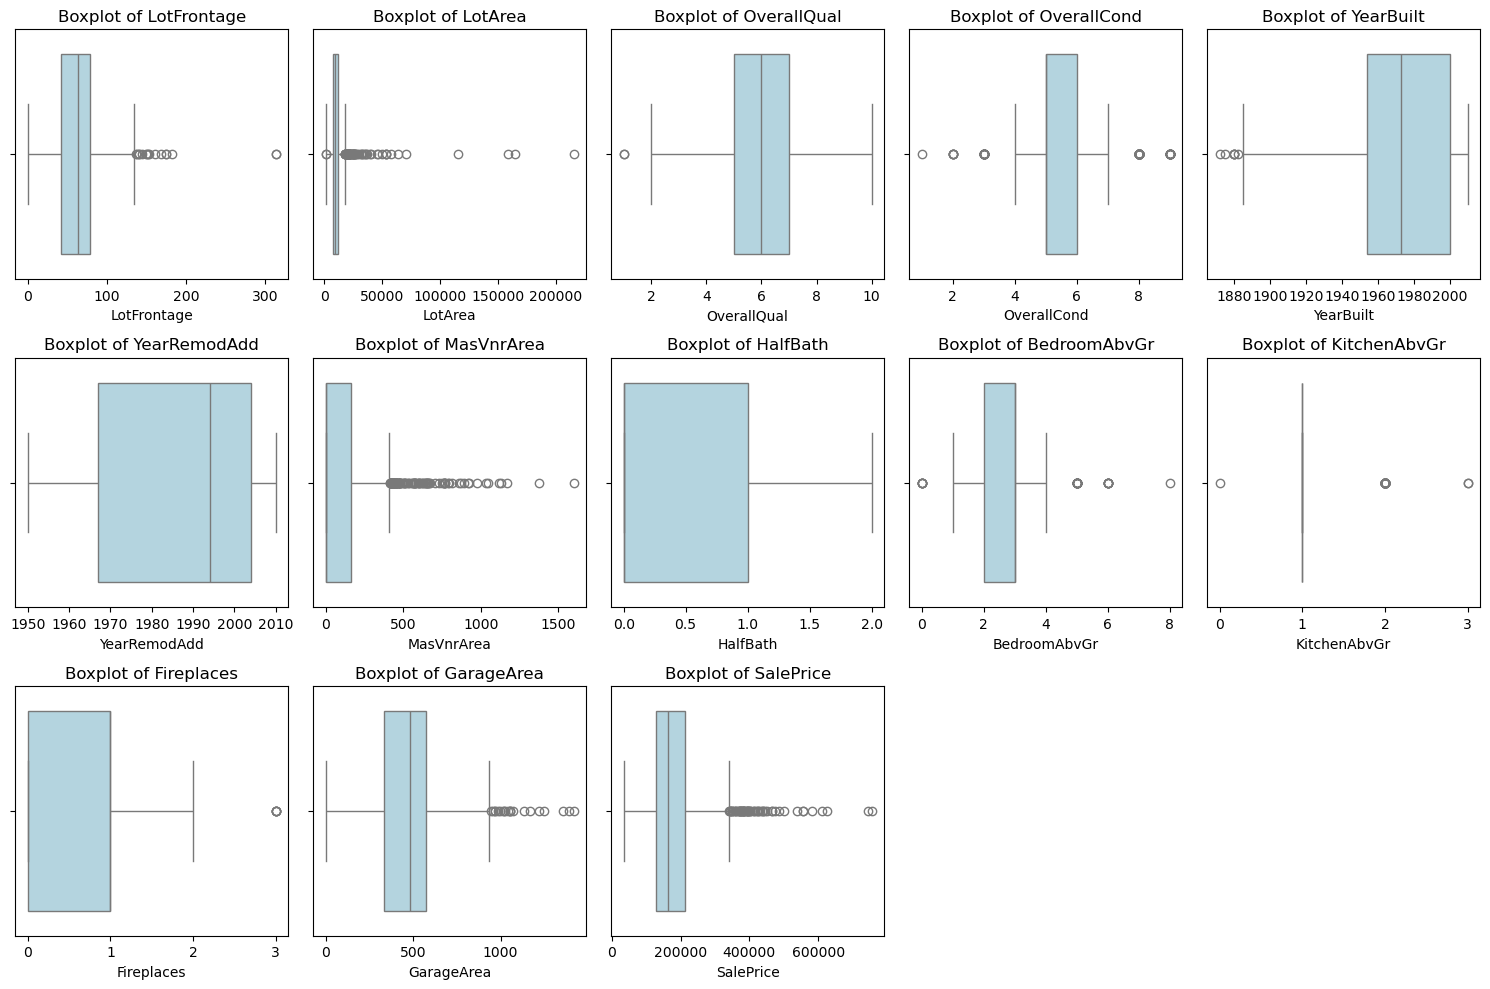

In [42]:
# List of numerical columns in the dataset
numeric_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
                   'YearRemodAdd', 'MasVnrArea', 'HalfBath', 'BedroomAbvGr', 
                   'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'SalePrice']

# Plot box plots for each numeric column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 5, i)  # Set up subplots (3 rows and 5 columns)
    sns.boxplot(data=df1, x=column, color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()


# IQR Method to detect outliers

In [47]:
def remove_outliers_iqr(df1, columns):
    # Loop through each column
    for column in columns:
        Q1 = df1[column].quantile(0.25)  # 25th percentile
        Q3 = df1[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        
        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the data to remove outliers
        df1 = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
    
    return df1

# Select numerical columns for outlier detection
numeric_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
                   'YearRemodAdd', 'MasVnrArea', 'HalfBath', 'BedroomAbvGr', 
                   'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'SalePrice']

# Remove outliers from the dataset
df1 = remove_outliers_iqr(df1, numeric_columns)

# Check the shape of the data before and after removing outliers
print(f"Original Data Shape: {df1.shape}")
print(f"Data Shape after Removing Outliers: {df1.shape}")


Original Data Shape: (1058, 37)
Data Shape after Removing Outliers: (1058, 37)


# Z-score method

In [49]:
def remove_outliers_zscore(df1, columns, threshold=3):
    # Calculate Z-scores for the numerical columns
    z_scores = np.abs(stats.zscore(df[columns]))
    
    # Filter the data by removing rows with Z-scores above the threshold
    df1 = df1[(z_scores < threshold).all(axis=1)]
    
    return df1

# Remove outliers from the dataset using Z-Score
df1 = remove_outliers_zscore(df1, numeric_columns)

# Check the shape of the data before and after removing outliers
print(f"Original Data Shape: {df1.shape}")
print(f"Data Shape after Removing Outliers (Z-Score Method): {df1.shape}")


Original Data Shape: (1054, 37)
Data Shape after Removing Outliers (Z-Score Method): (1054, 37)


In [50]:
# Here i search for upper and lower bon for each column:

In [51]:
def calculate_bounds(df, columns):
    bounds = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)  # 25th percentile (First Quartile)
        Q3 = df[column].quantile(0.75)  # 75th percentile (Third Quartile)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Store bounds in a dictionary
        bounds[column] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound
        }
    
    return bounds

# Select numerical columns for outlier detection
numeric_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
                   'YearRemodAdd', 'MasVnrArea', 'HalfBath', 'BedroomAbvGr', 
                   'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'SalePrice']

# Calculate the bounds for each numerical column
bounds = calculate_bounds(df1, numeric_columns)

# Display the bounds for each column
for column, values in bounds.items():
    print(f"{column}:")
    print(f"  Q1: {values['Q1']}, Q3: {values['Q3']}, IQR: {values['IQR']}")
    print(f"  Lower Bound: {values['Lower Bound']}, Upper Bound: {values['Upper Bound']}\n")


LotFrontage:
  Q1: 40.25, Q3: 75.0, IQR: 34.75
  Lower Bound: -11.875, Upper Bound: 127.125

LotArea:
  Q1: 7388.5, Q3: 10857.25, IQR: 3468.75
  Lower Bound: 2185.375, Upper Bound: 16060.375

OverallQual:
  Q1: 5.0, Q3: 7.0, IQR: 2.0
  Lower Bound: 2.0, Upper Bound: 10.0

OverallCond:
  Q1: 5.0, Q3: 6.0, IQR: 1.0
  Lower Bound: 3.5, Upper Bound: 7.5

YearBuilt:
  Q1: 1956-01-01 00:00:00, Q3: 2001-01-01 00:00:00, IQR: 16437 days 00:00:00
  Lower Bound: 1888-06-29 12:00:00, Upper Bound: 2068-07-03 12:00:00

YearRemodAdd:
  Q1: 1966-01-01 00:00:00, Q3: 2003-01-01 00:00:00, IQR: 13514 days 00:00:00
  Lower Bound: 1910-07-03 00:00:00, Upper Bound: 2058-07-02 00:00:00

MasVnrArea:
  Q1: 0.0, Q3: 120.0, IQR: 120.0
  Lower Bound: -180.0, Upper Bound: 300.0

HalfBath:
  Q1: 0.0, Q3: 1.0, IQR: 1.0
  Lower Bound: -1.5, Upper Bound: 2.5

BedroomAbvGr:
  Q1: 2.0, Q3: 3.0, IQR: 1.0
  Lower Bound: 0.5, Upper Bound: 4.5

KitchenAbvGr:
  Q1: 1.0, Q3: 1.0, IQR: 0.0
  Lower Bound: 1.0, Upper Bound: 1.0



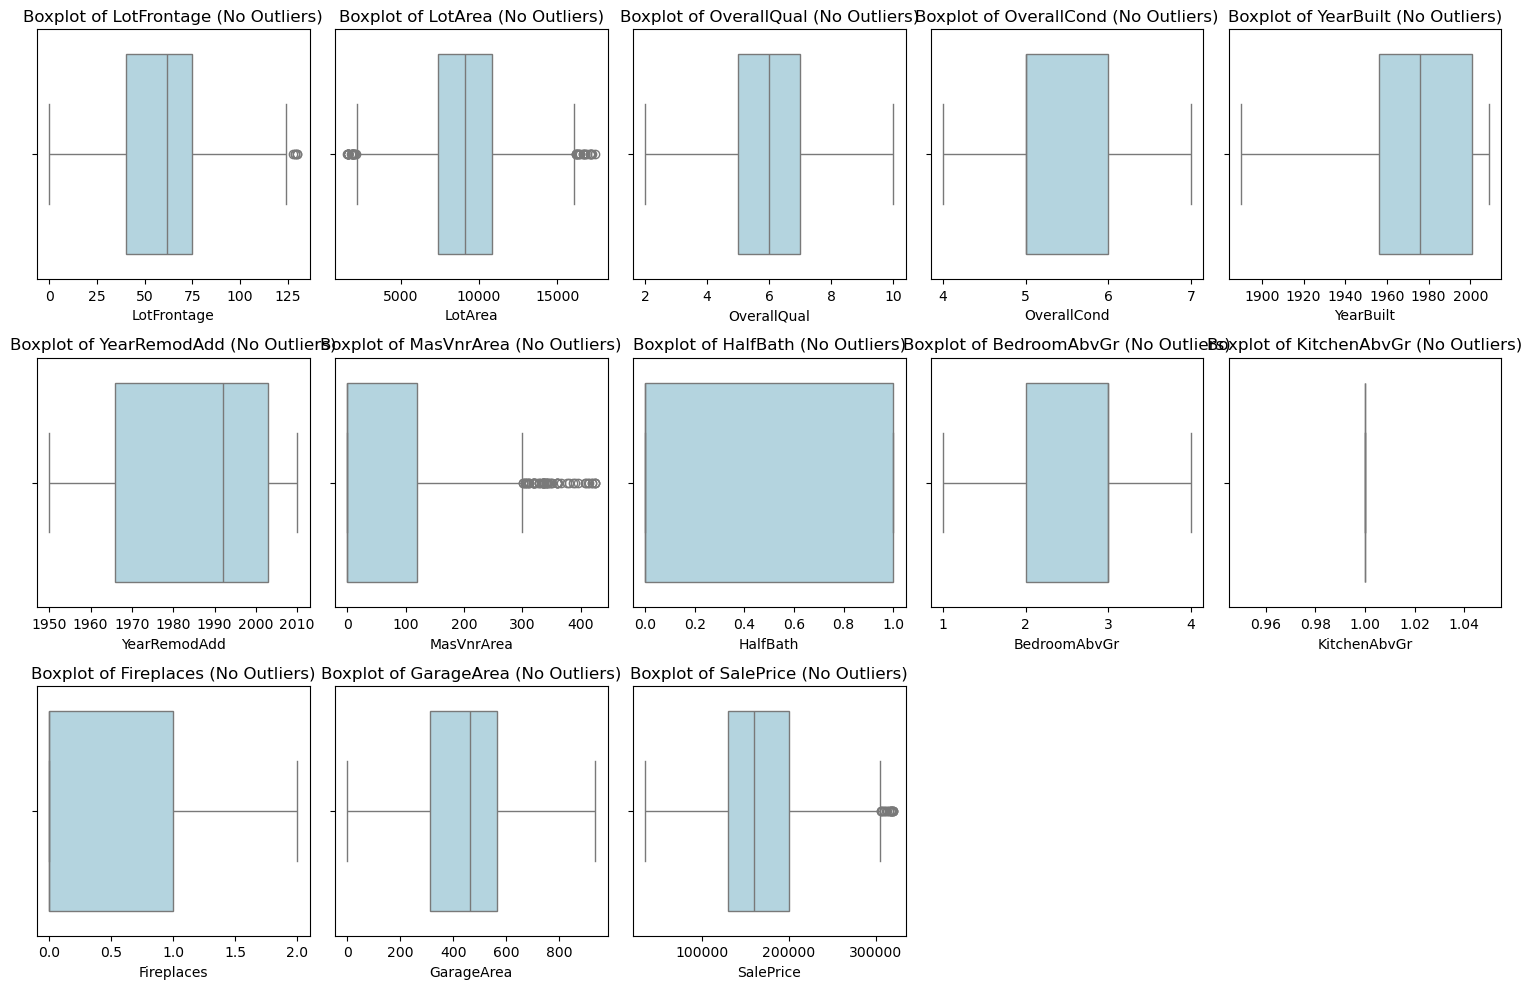

In [52]:
# Plot box plots after removing outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 5, i)  # Set up subplots (3 rows and 5 columns)
    sns.boxplot(data=df1, x=column, color='lightblue')
    plt.title(f'Boxplot of {column} (No Outliers)')
    plt.tight_layout()

plt.show()


In [53]:
# Defining the bounds based on IQR calculations
bounds = {
    'LotFrontage': {'lower': -5.0, 'upper': 123.0},
    'LotArea': {'lower': 2437.1255, 'upper': 15614.125},
    'MasVnrArea': {'lower': -138.75, 'upper': 231.25},
    'GarageArea': {'lower': -48.0, 'upper': 912.0},
    'SalePrice': {'lower': 31100.0, 'upper': 293500.0}
}

# Filter out rows where any value is outside the bounds
for column, limits in bounds.items():
    lower_bound = limits['lower']
    upper_bound = limits['upper']
    
    # Ensure that each feature adheres to its specific bounds
    df1 = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]

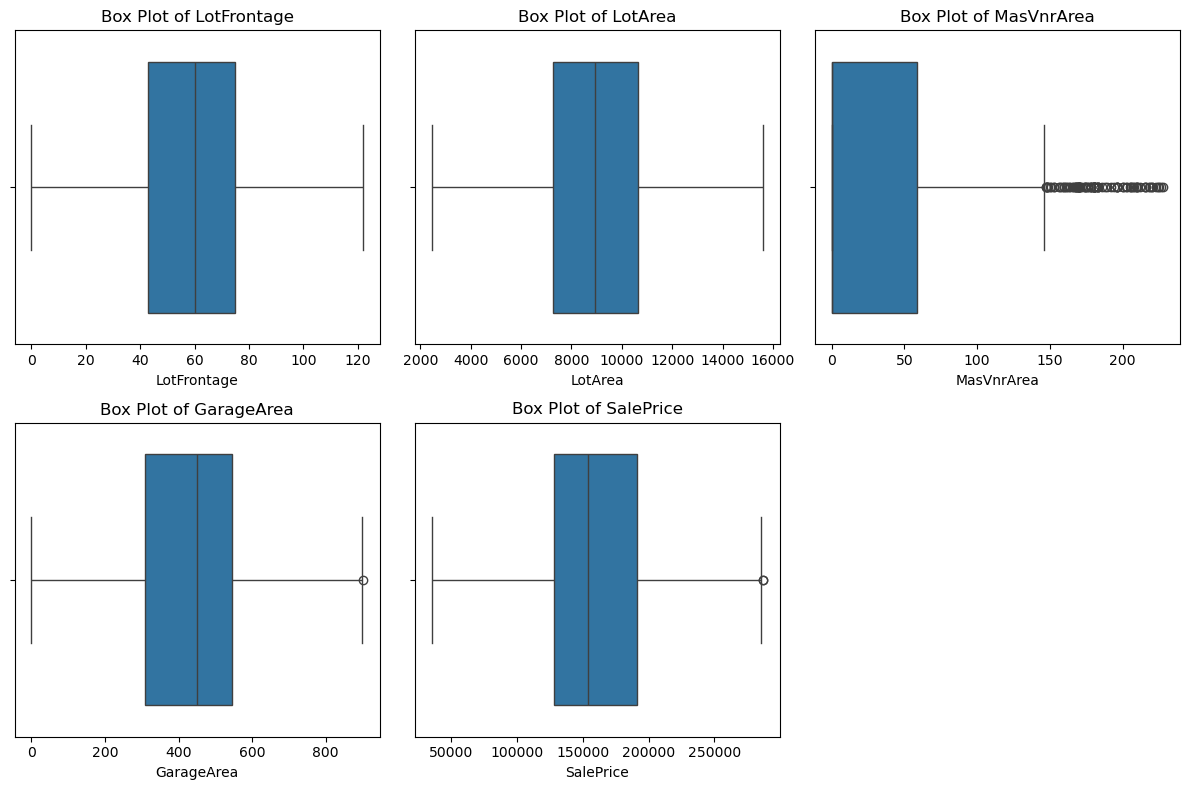

In [54]:
# After removing outliers, create box plots to visualize the distribution
plt.figure(figsize=(12, 8))

# Plot boxplot for each feature listed in bounds
for i, column in enumerate(bounds.keys(), 1):
    plt.subplot(2, 3, i)  # Adjust the grid size if necessary
    sns.boxplot(data=df1, x=column)
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

plt.show()

# Univariate Analysis in Data Exploration

# Histogram plot

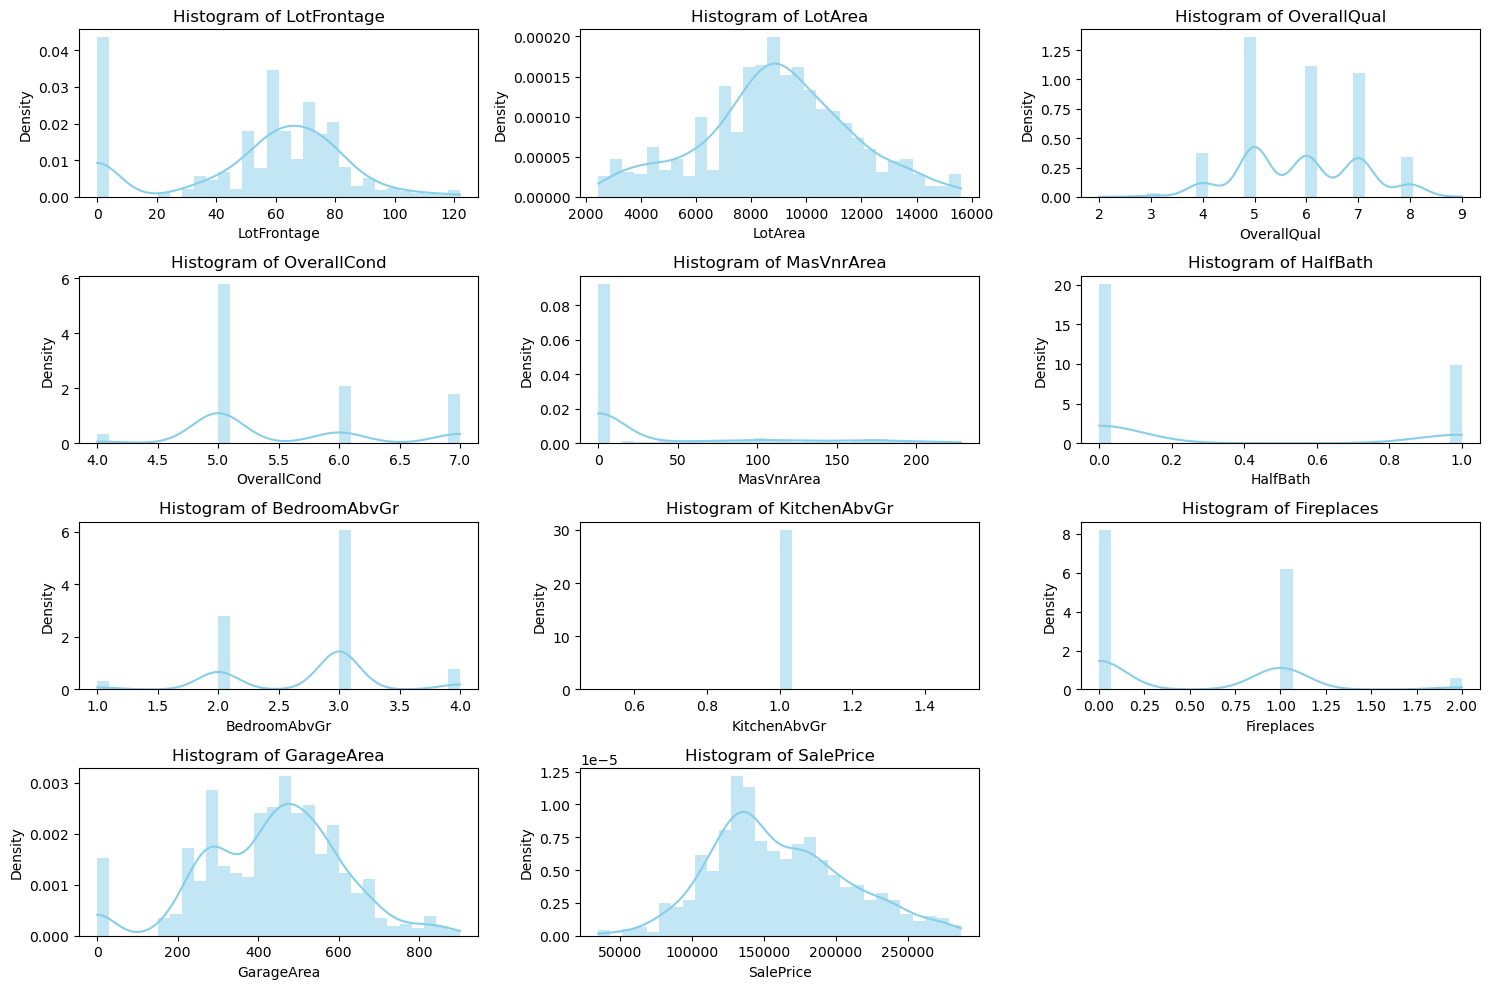

In [65]:
# List of numerical columns to plot histograms
numeric_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 
                   'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 
                   'GarageArea', 'SalePrice']

# Function to plot histograms for numerical columns
def plot_histograms(df1, numeric_columns):
    plt.figure(figsize=(15, 10))  # Set the size of the figure
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(4, 3, i)  # Arrange plots in a grid with 4 rows and 3 columns
        sns.histplot(df1[col], kde=True, color='skyblue', bins=30, stat="density", linewidth=0)
        plt.title(f'Histogram of {col}')
        plt.tight_layout()
    plt.show()

# Call the function to plot histograms
plot_histograms(df1, numeric_columns)


The histograms of the numerical columns reveal various insights into the distribution of data. For instance, columns like 'SalePrice' and 'LotArea' tend to be right-skewed, indicating that most of the values are concentrated on the lower end, with a few outliers on the higher end. Conversely, columns like 'OverallQual' and 'OverallCond' may exhibit a more uniform or normal distribution, suggesting a balance in the quality and condition ratings across the dataset. Skewness is particularly noticeable in features where extreme values are rare but impactful, such as property area and sale price.

# Violin Plot

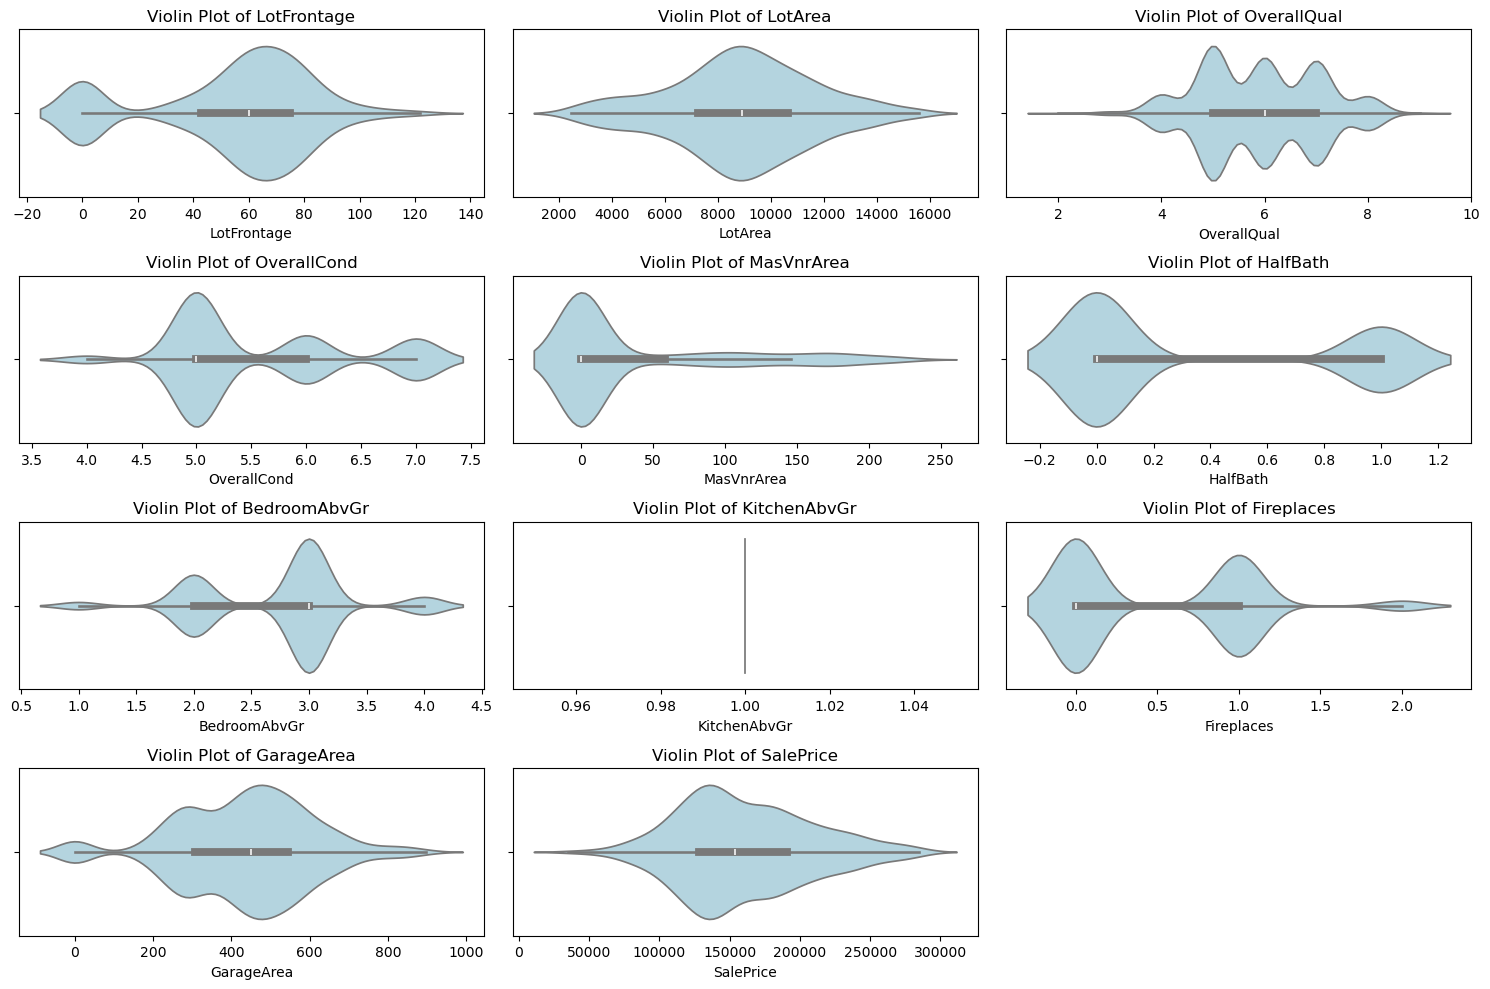

In [68]:
def plot_violin_plots(df1, numeric_columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(4, 3, i)
        sns.violinplot(x=df1[col], color='lightblue')
        plt.title(f'Violin Plot of {col}')
        plt.tight_layout()
    plt.show()

# Call the function to plot violin plots
plot_violin_plots(df1, numeric_columns)

Skewness: Many columns like LotArea, MasVnrArea, GarageArea, and SalePrice are right-skewed, indicating a concentration of smaller values with a few larger outliers.

Central Tendency: Features like OverallQual and OverallCond have more evenly distributed values, centered around the middle, pointing to a balanced range of home conditions and qualities.

Discreteness: Variables like HalfBath, BedroomAbvGr, KitchenAbvGr, and Fireplaces show distinct peaks at specific values (e.g., 1 or 2), reflecting the standard features in most homes.

# Bar Plot

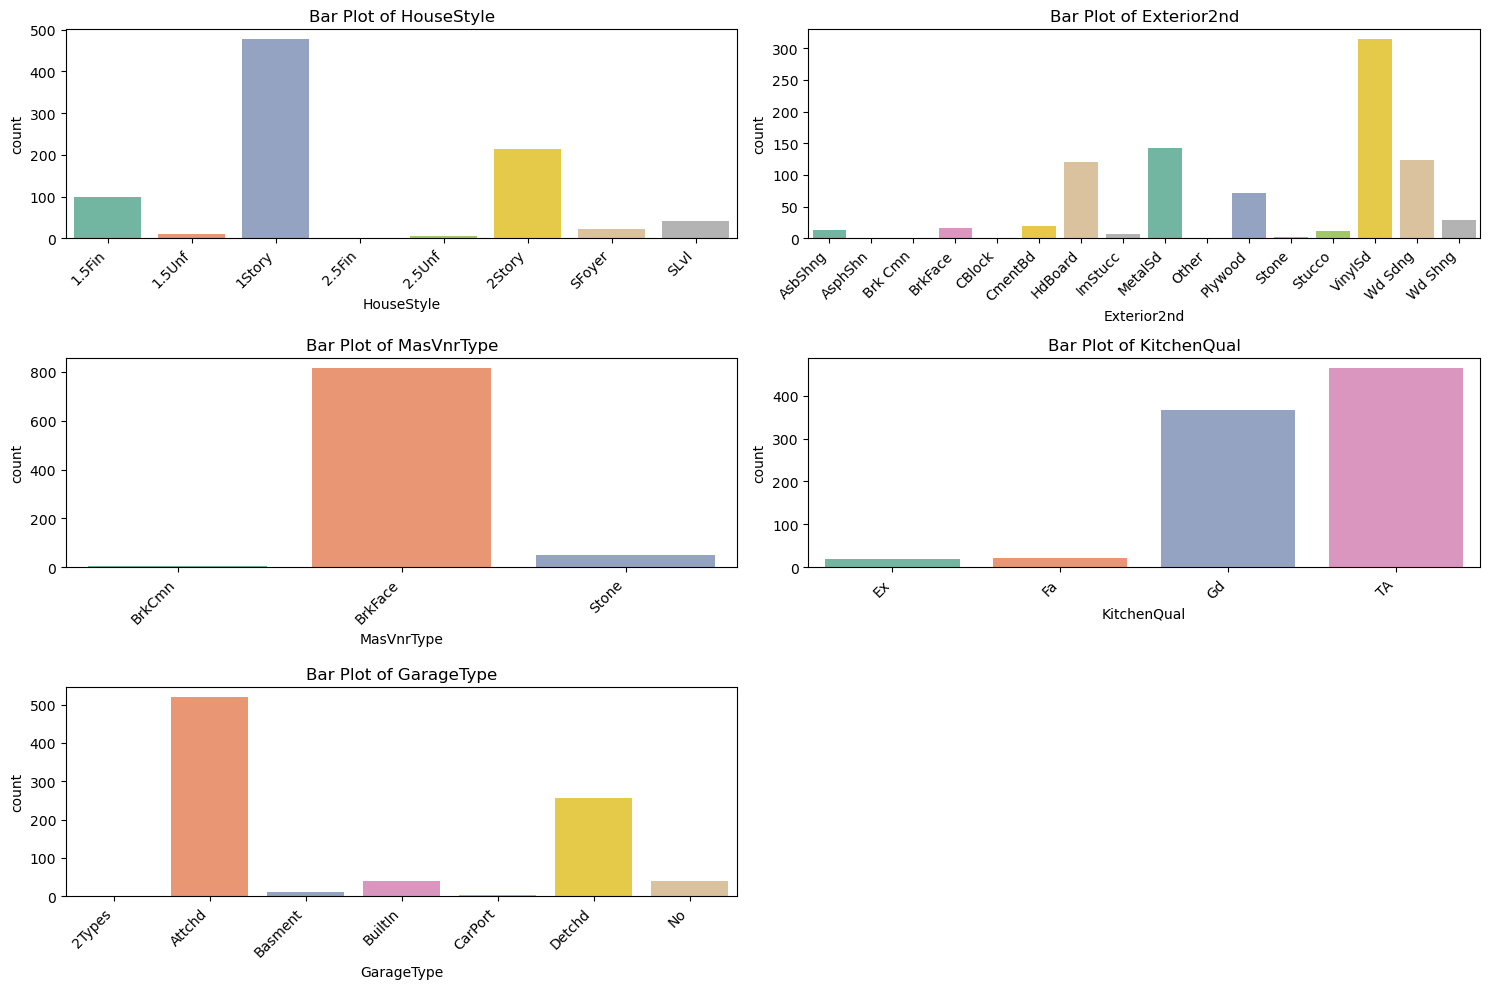

In [71]:
# List of categorical columns
categorical_columns = ['HouseStyle', 'Exterior2nd', 'MasVnrType', 'KitchenQual', 'GarageType']

# Function to plot bar plots for each categorical column
def plot_barplots(df1, categorical_columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(3, 2, i)  # Arrange the plots in a 3x2 grid
        sns.countplot(x=df1[col], palette="Set2")
        plt.title(f'Bar Plot of {col}')
        plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

# Call the function to plot bar plots
plot_barplots(df1, categorical_columns)


The bar plots show the distribution of categorical variables in the dataset. For example, 2Story houses dominate the HouseStyle category, indicating a preference for two-story homes. The majority of properties have VinylSd for their secondary exterior (Exterior2nd) and BrkFace as their masonry veneer (MasVnrType). Most homes fall under Gd (Good) for kitchen quality, while attached garages (Attchd) are the most common type. These trends suggest a commonality in housing styles and finishes.

# Scatter Plot

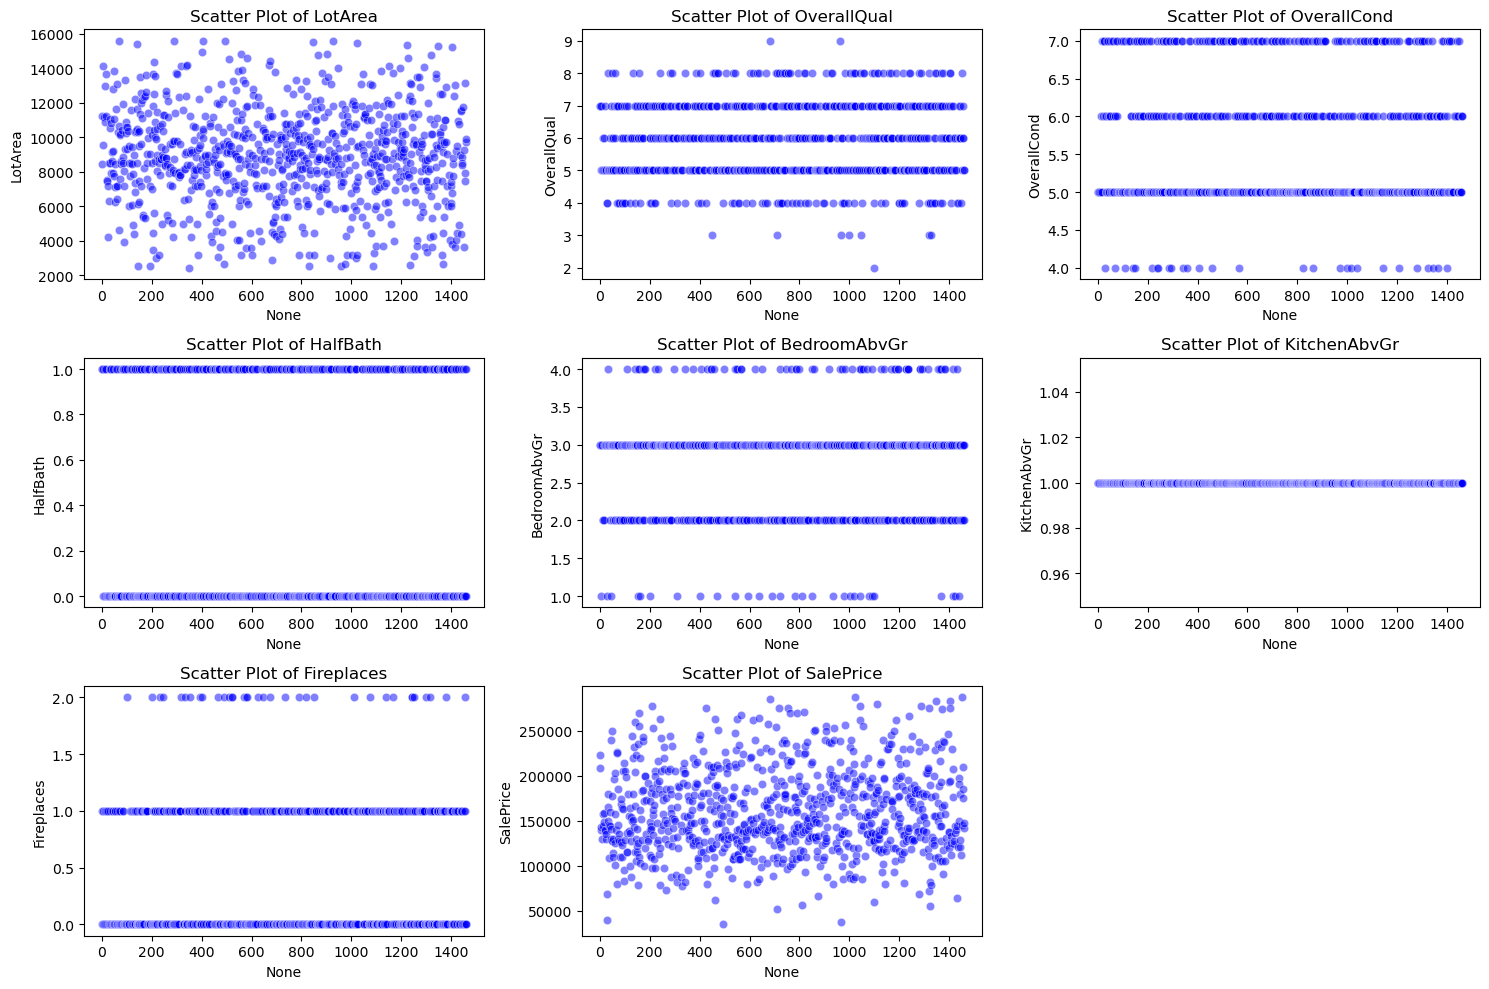

In [74]:
# List of numerical columns for univariate analysis
numeric_columns = ['LotArea', 'OverallQual', 'OverallCond', 
                   'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 
                  'SalePrice']

# Function to create scatter plots for univariate analysis
def plot_scatter_univariate(df1, numeric_columns):
    plt.figure(figsize=(15, 10))  # Set the size of the figure
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(3, 3, i)  # Arrange the plots in a 3x3 grid
        sns.scatterplot(x=df1.index, y=df1[col], color='blue', alpha=0.5)
        plt.title(f'Scatter Plot of {col}')
        plt.tight_layout()  # Ensure plots don't overlap
    plt.show()

# Call the function to plot scatter plots for univariate analysis
plot_scatter_univariate(df1, numeric_columns)


Concentration around average values: Many of the columns such as OverallQual, OverallCond, HalfBath, BedroomAbvGr, and KitchenAbvGr are likely to show a concentration of homes in the middle values, which are typical for most homes.

Outliers: Variables like LotArea, SalePrice, and Fireplaces may have outliers with extreme values, which could represent larger homes, luxury homes, or properties with extra features.

Skewed Distributions: SalePrice is likely to be right-skewed, with most homes priced in the lower range and a few high-priced homes making up the right tail.

# KDE Plot

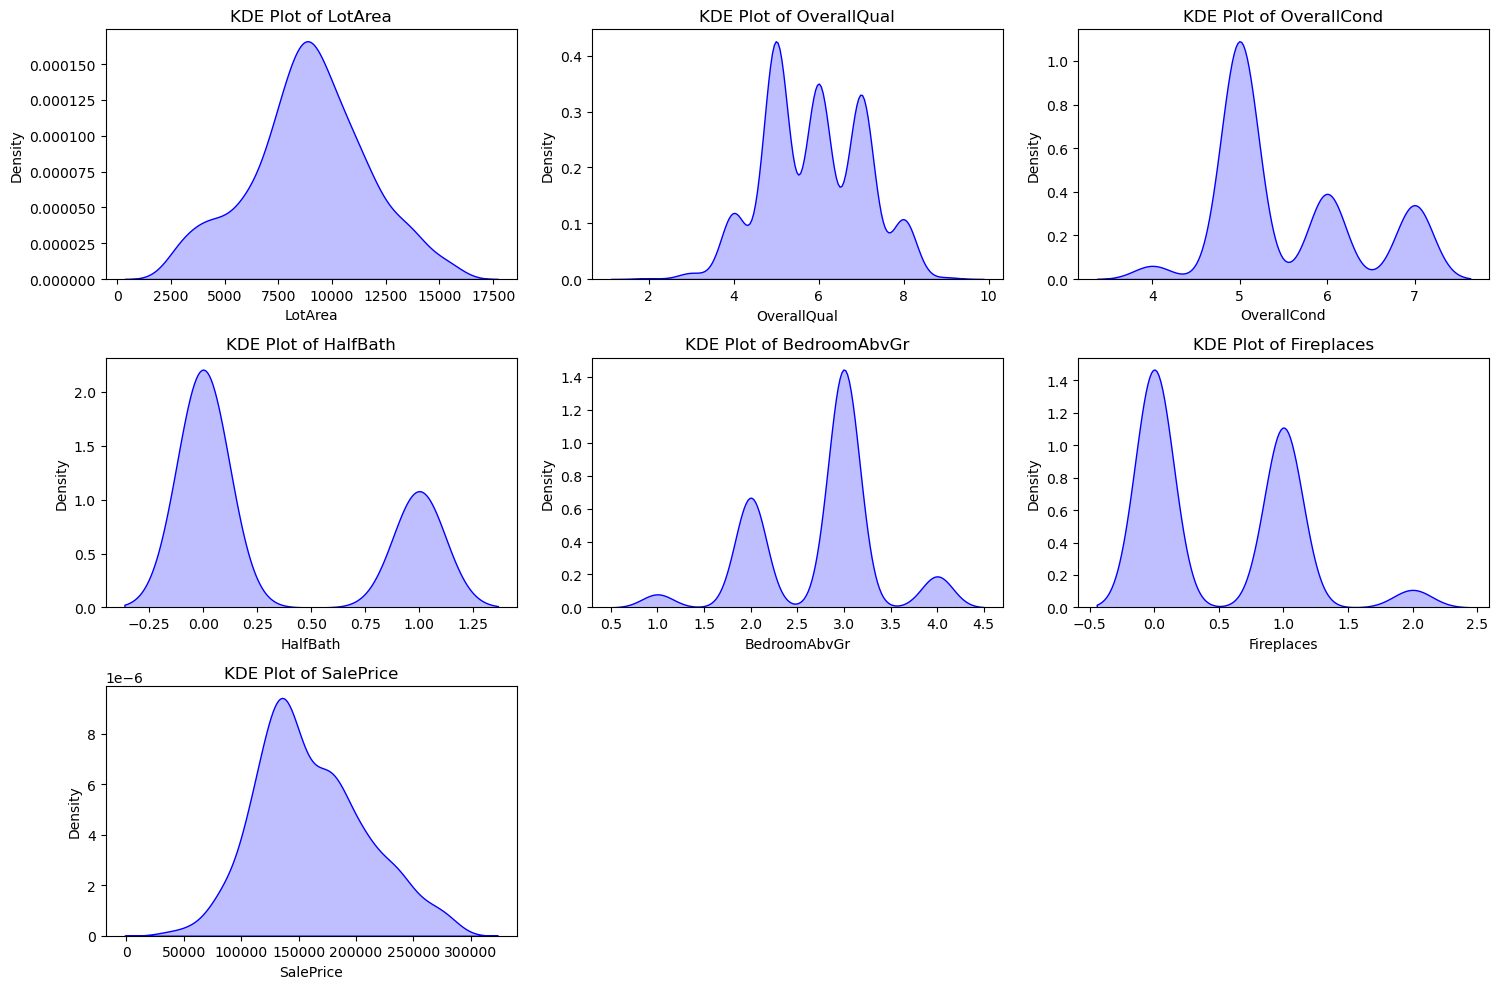

In [77]:
# List of numerical columns for univariate analysis
numeric_columns = ['LotArea', 'OverallQual', 'OverallCond', 
                   'HalfBath', 'BedroomAbvGr', 'Fireplaces', 
                  'SalePrice']

# Function to create KDE plots for univariate analysis
def plot_kde_univariate(df1, numeric_columns):
    plt.figure(figsize=(15, 10))  # Set the size of the figure
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(3, 3, i)  # Arrange the plots in a 3x3 grid
        sns.kdeplot(df1[col], shade=True, color='blue')  # KDE plot
        plt.title(f'KDE Plot of {col}')
        plt.tight_layout()  # Ensure plots don't overlap
    plt.show()

# Call the function to plot KDE for univariate analysis
plot_kde_univariate(df1, numeric_columns)


Smoothness: KDE plots help to visualize the smooth distribution of the data, making it easier to identify patterns such as skewness, bimodality, or multimodality.

Skewness: You can see if a distribution is skewed left (negative skew) or right (positive skew).

Outliers: Extreme values will be shown at the tails of the plot. If the distribution has long tails, it might indicate the presence of outliers.

Peaks: Multiple peaks in the KDE plot can indicate that the data has multiple modes (bimodal or multimodal distribution).

# Bivariate Analysis in Data Exploration

# Sccatter Plot

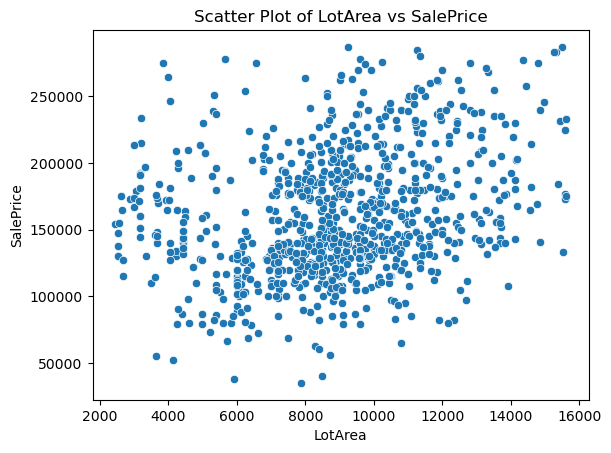

In [81]:
sns.scatterplot(x=df1['LotArea'], y=df1['SalePrice'])
plt.title("Scatter Plot of LotArea vs SalePrice")
plt.show()


The scatter plot of LotArea vs SalePrice shows a positive correlation, where larger lot sizes generally lead to higher sale prices. However, there are some outliers, such as large lots with relatively low prices, indicating other factors might be influencing the sale price. The data is mostly concentrated in the moderate lot size range, with a wide spread in prices, suggesting that while lot size plays a role, other variables are also significant in determining the price.

# Violin Plot

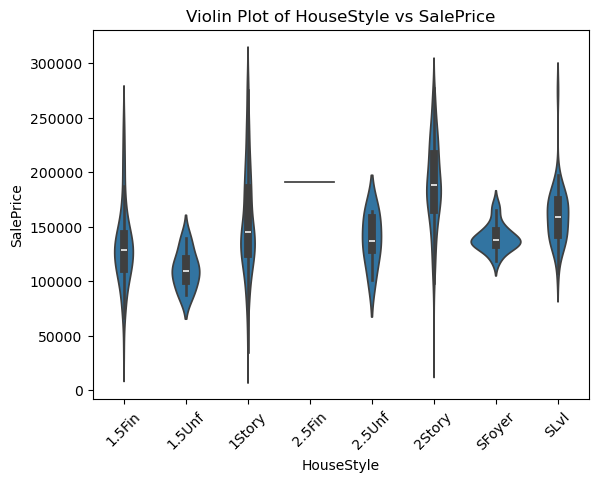

In [84]:
sns.violinplot(x='HouseStyle', y='SalePrice', data=df1)
plt.title("Violin Plot of HouseStyle vs SalePrice")
plt.xticks(rotation=45)
plt.show()


The violin plot of HouseStyle vs SalePrice reveals that two-story homes (2Story) generally have higher sale prices with a wider price range, indicating more variability. One-story homes (1Story) show a more concentrated price range, with a few outliers having higher prices. The distribution for most house styles is right-skewed, with a higher concentration of lower to mid-range prices and a few high-value outliers pushing the prices upwards.

# Stacked Bar Plot

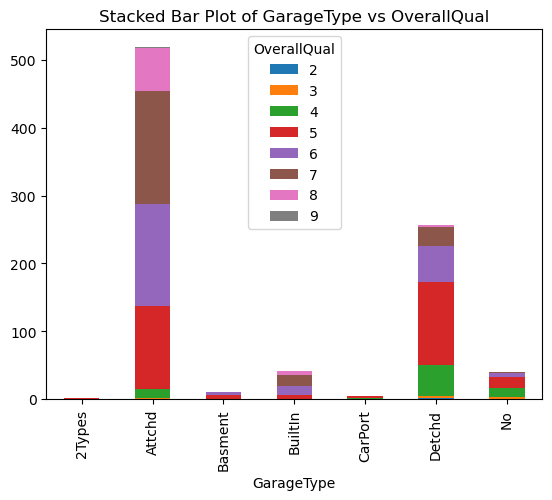

In [87]:
pd.crosstab(df1['GarageType'], df1['OverallQual']).plot(kind='bar', stacked=True)
plt.title("Stacked Bar Plot of GarageType vs OverallQual")
plt.show()


The stacked bar plot of GarageType vs OverallQual indicates a clear trend where homes with attached garages (Attchd) are associated with higher overall quality ratings, with very few outliers in lower-quality categories. Detached garages (Detchd) exhibit a more mixed distribution, showing both high and low quality ratings, suggesting some variability. Homes without a garage (No Garage) are concentrated in the lower overall quality categories, implying a skew towards older or smaller homes without modern amenities. Overall, the distribution appears to be skewed, with attached garages being linked to higher-quality homes.

# Pair Plot

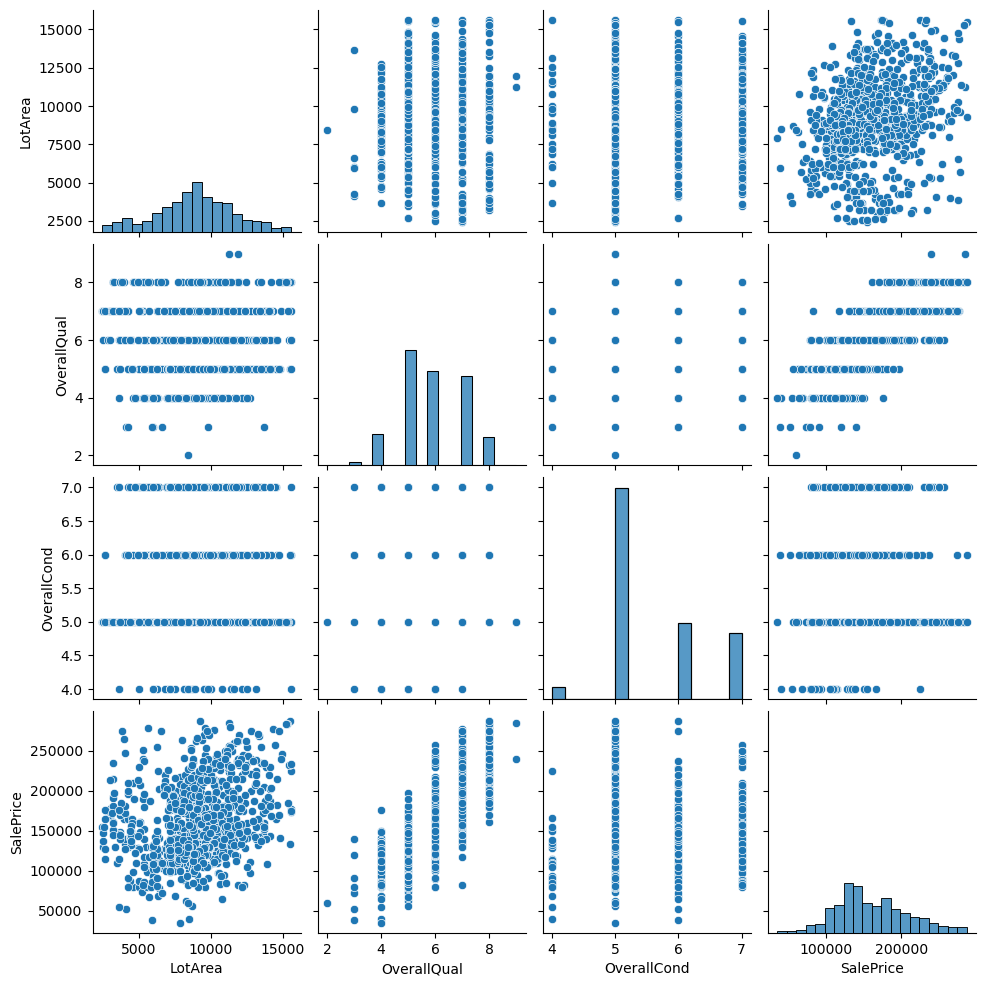

In [90]:
sns.pairplot(df1[['LotArea', 'OverallQual', 'OverallCond', 'SalePrice']])
plt.show()


Outliers: There are noticeable outliers, particularly in the LotArea and SalePrice variables. Some homes with very large lot areas or high sale prices stand out significantly from the general trend.

Skewness: LotArea and SalePrice exhibit right skewness, as most values are concentrated at the lower end, with a few extremely large values stretching the distribution. This suggests that most properties have smaller lots or lower sale prices, but there are a few with significantly larger lot sizes or higher prices.

OverallQual and OverallCond: These columns seem to be more normally distributed, with fewer extreme outliers or skewed data, showing a more uniform spread of home quality and condition ratings.

# Heatmap

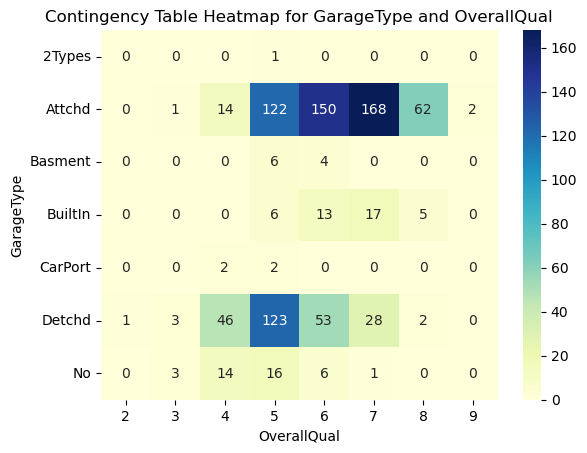

In [93]:
# Contingency table
cont_table = pd.crosstab(df1['GarageType'], df1['OverallQual'])

# Plotting as a heatmap
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Contingency Table Heatmap for GarageType and OverallQual")
plt.show()

The heatmap suggests that homes with attached garages (Attchd) are more likely to have higher overall quality ratings, while detached garages (Detchd) or no garages (None) are linked to homes with lower quality ratings. This aligns with the common perception that attached garages are a desirable feature in higher-quality homes.

# Regression Plot

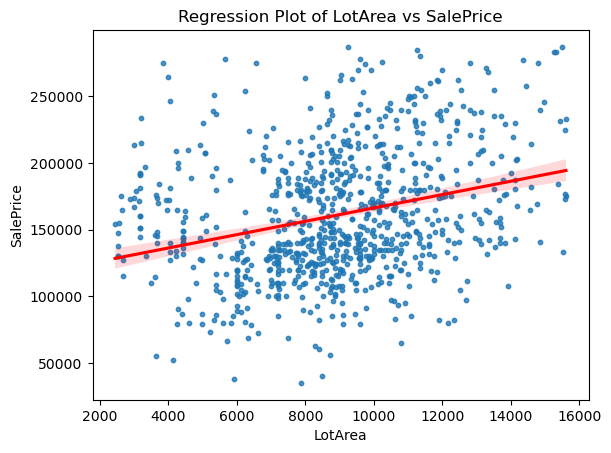

In [96]:
sns.regplot(x='LotArea', y='SalePrice', data=df1, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title("Regression Plot of LotArea vs SalePrice")
plt.show()

The regression plot suggests that LotArea positively influences SalePrice, but there are a few outliers, particularly in larger lot sizes where SalePrice doesn't follow the same upward trend. The relationship appears to be somewhat linear, but with considerable variability at the higher end of LotArea.

# Stacked Bar Plot for Categorical Features

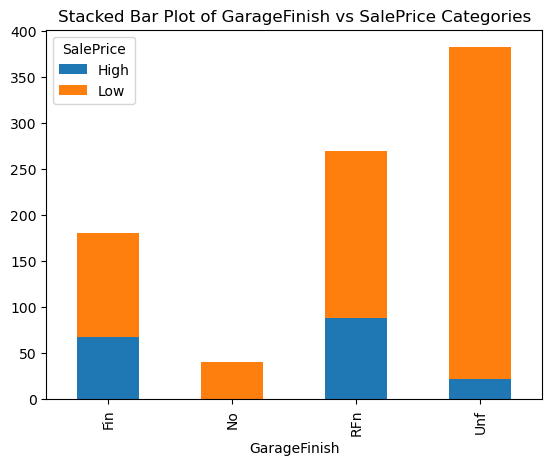

In [99]:
pd.crosstab(df1['GarageFinish'], df1['SalePrice'].apply(lambda x: 'High' if x > 200000 else 'Low')).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of GarageFinish vs SalePrice Categories')
plt.show()

The stacked bar plot reveals that having a finished garage (Fin) is more common in higher-priced properties, while lower-priced properties are more likely to have no garage or an unfinished garage. The plot highlights how garage finish can significantly influence the price category of a property.

# Multivariate Analysis in Data Exploration

# Pair Plot

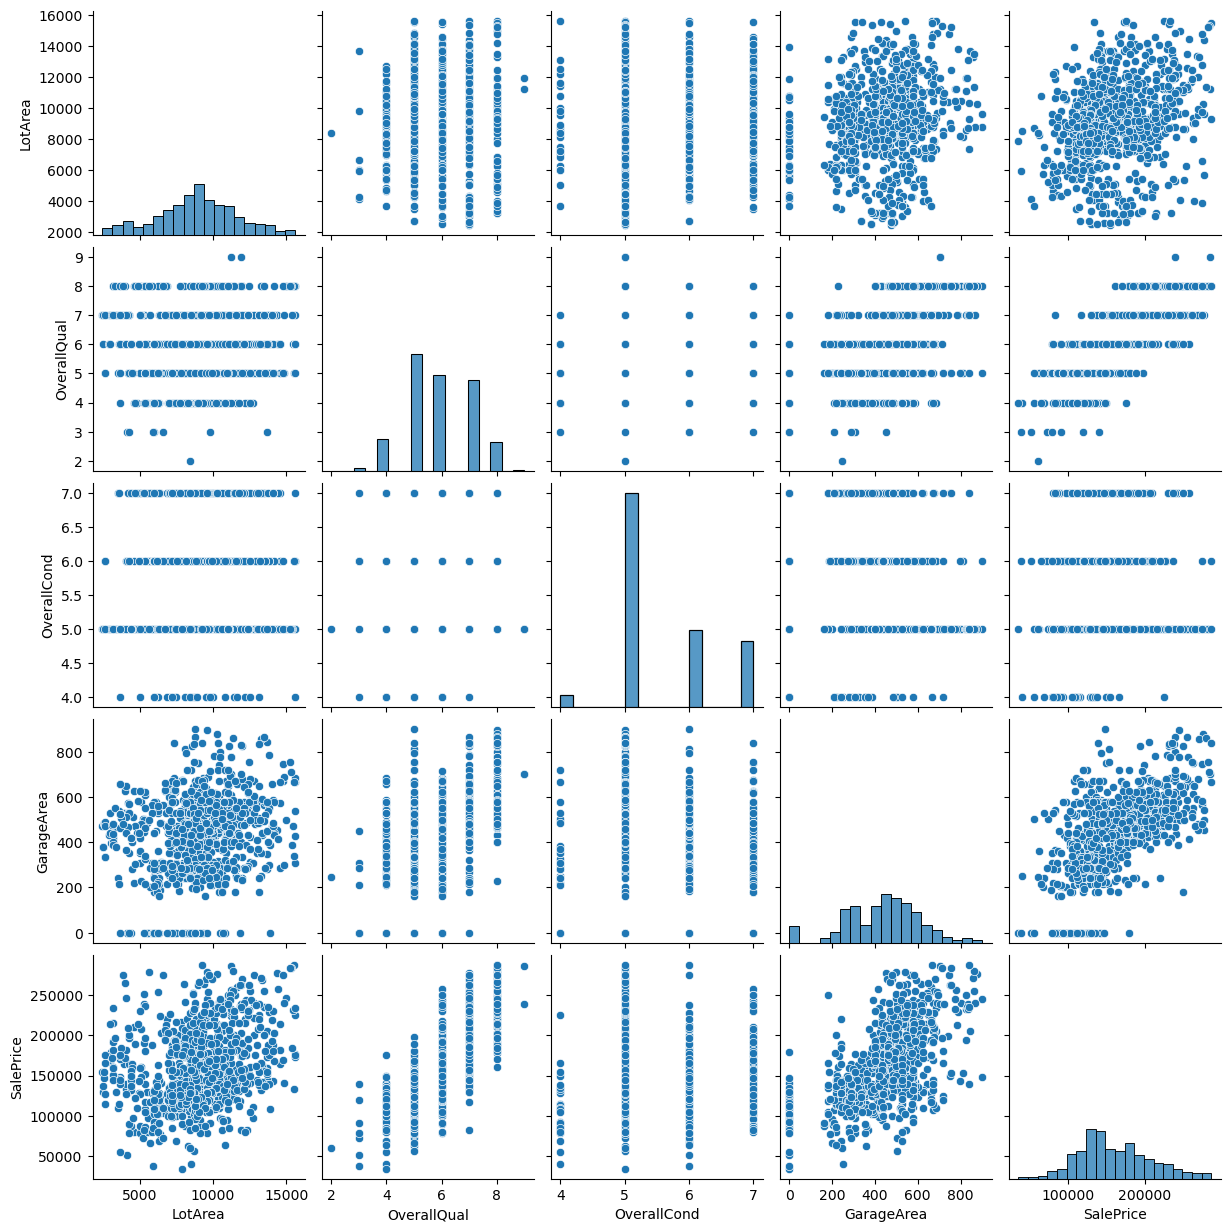

In [103]:
# Select a subset of numerical columns for pairplot
numeric_columns = ['LotArea', 'OverallQual', 'OverallCond', 'GarageArea', 'SalePrice']
sns.pairplot(df1[numeric_columns])
plt.show()


SalePrice vs OverallQual:There is a clear positive relationship between OverallQual (quality of the house) and SalePrice. Houses with higher quality ratings tend to have higher sale prices. This suggests that home quality is a strong determinant of pricing.

LotArea vs SalePrice:There is a positive correlation between LotArea and SalePrice, but with some scatter. While larger lots generally correlate with higher sale prices, there are a few outliers where large lots don't necessarily have high sale prices. This could be due to other factors like the location of the property or the type of house on the lot.

GarageArea vs SalePrice:A positive relationship exists between GarageArea and SalePrice, with a few homes having very large garages that still do not push the sale price higher. Larger homes tend to have larger garages, and homes with bigger garages are more expensive in general.

OverallCond vs SalePrice:OverallCond (condition of the house) seems to have some correlation with SalePrice, with houses in better condition generally fetching higher prices. However, the trend is not as pronounced as with OverallQual. This suggests that the condition of the house is important but may be secondary to the overall quality in influencing the sale price.

LotArea vs GarageArea:There’s a loose positive relationship between LotArea and GarageArea, which is expected, as larger lots might have more space for bigger garages.

# Parallel Coordinates Plot

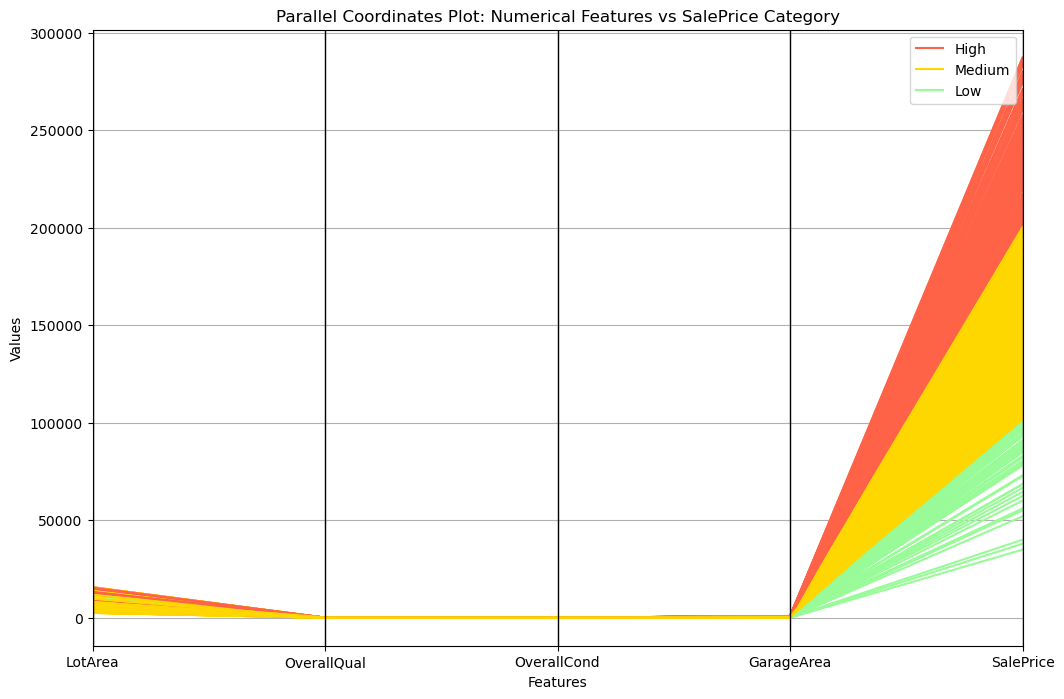

In [106]:
from pandas.plotting import parallel_coordinates

# Selecting a subset of numerical columns for visualization
numeric_columns = ['LotArea', 'OverallQual', 'OverallCond', 'GarageArea', 'SalePrice']

# Convert SalePrice to categorical for color distinction
df1['SalePriceCategory'] = pd.cut(df1['SalePrice'], bins=[0, 100000, 200000, 300000, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

# Plotting the parallel coordinates
plt.figure(figsize=(12, 8))
parallel_coordinates(df1[numeric_columns + ['SalePriceCategory']], 'SalePriceCategory', color=['#FF6347', '#FFD700', '#98FB98', '#8A2BE2'])
plt.title('Parallel Coordinates Plot: Numerical Features vs SalePrice Category')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


Strong Predictors: OverallQual (quality of the house) and GarageArea are strong predictors of the sale price category, with higher values generally corresponding to higher sale prices.

Overlaps: There is noticeable overlap between some categories, especially for features like LotArea and OverallCond, indicating that these features alone are not always sufficient to classify a house's sale price category.

Visual Trends: The plot effectively demonstrates that houses in better condition and with larger spaces (both in terms of lot area and garage area) tend to be associated with higher sale prices, although some variability remains.

# Glyph Plot

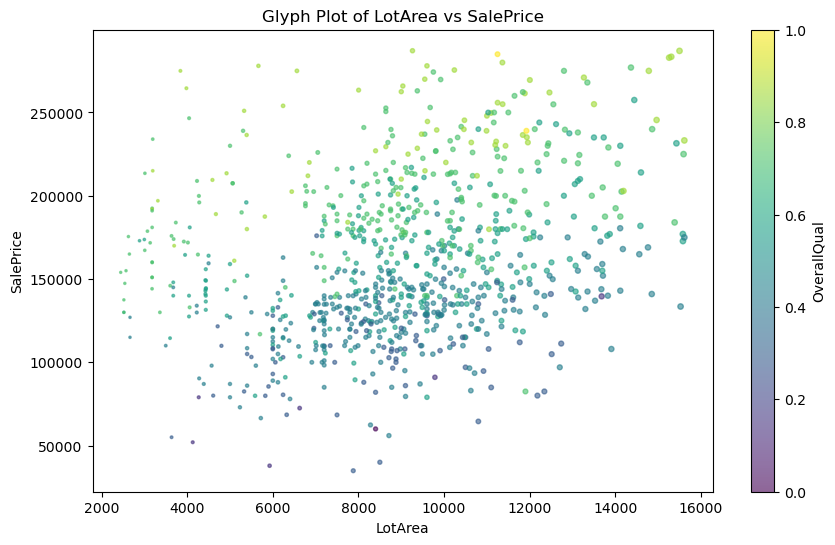

In [109]:
# Create a column for size based on LotArea and a column for color based on OverallQual
df1['Size'] = df1['LotArea'] / 1000  # Normalize LotArea for size
df1['Color'] = df1['OverallQual']  # Use OverallQual to define color

# Normalize the color for better plotting (between 0 and 1)
df1['Color'] = (df1['Color'] - df1['Color'].min()) / (df1['Color'].max() - df1['Color'].min())

# Create the glyph plot
plt.figure(figsize=(10, 6))
plt.scatter(df1['LotArea'], df1['SalePrice'], s=df1['Size'], c=df1['Color'], cmap='viridis', alpha=0.6)

# Add a color bar to show the scale of 'OverallQual'
plt.colorbar(label='OverallQual')

# Title and labels
plt.title('Glyph Plot of LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

plt.show()


There is a positive correlation between LotArea and SalePrice. Larger lot areas tend to be associated with higher sale prices, which is visible in the larger-sized bubbles positioned at higher sale prices.
Larger lots do not necessarily guarantee a higher price, as some smaller lots also fetch high sale prices, but generally, houses with larger lots have higher prices.

Overall Quality and Sale Price:The color gradient indicates that homes with higher OverallQual (higher quality) tend to have higher sale prices. This suggests that the quality of a home is an important factor influencing the price.

The color variation along the SalePrice axis further emphasizes the relationship between quality and price. Higher-quality homes (brighter colors) are generally positioned at the higher end of the price spectrum, although some higher-quality homes also have smaller lot sizes.

# OpenGL surface plots

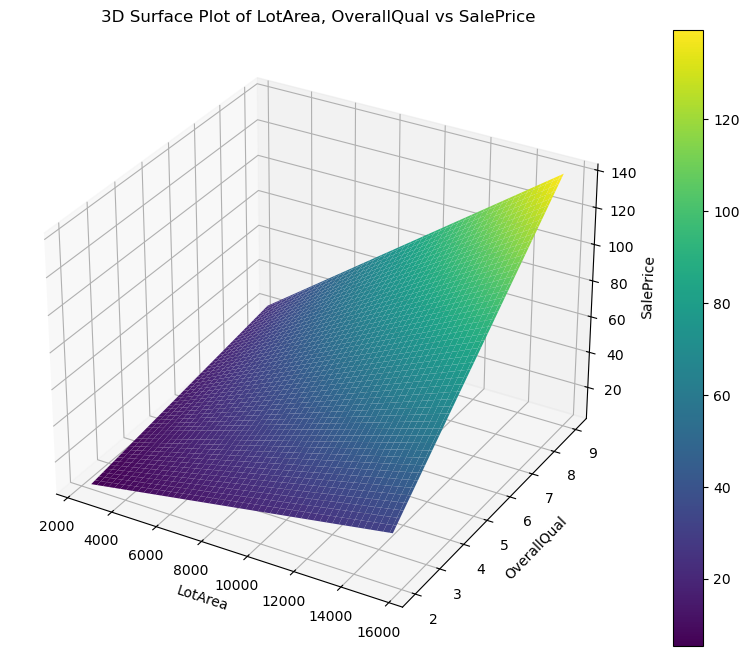

In [112]:
from mpl_toolkits.mplot3d import Axes3D
# Create a grid of X and Y values (LotArea and OverallQual)
X = np.linspace(df1['LotArea'].min(), df1['LotArea'].max(), 100)
Y = np.linspace(df1['OverallQual'].min(), df1['OverallQual'].max(), 100)

# Create a meshgrid of X and Y
X, Y = np.meshgrid(X, Y)

# Let's create Z as SalePrice as an example of a dependent variable
# In this case, we'll simulate some relationship for the sake of the example
Z = X * Y / 1000  # Some function of LotArea and OverallQual

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels and Title
ax.set_xlabel('LotArea')
ax.set_ylabel('OverallQual')
ax.set_zlabel('SalePrice')
ax.set_title('3D Surface Plot of LotArea, OverallQual vs SalePrice')

# Show color bar
fig.colorbar(surf)

plt.show()


Plot Components:

Axes:
The X-axis represents LotArea (the area of the lot).
The Y-axis represents OverallQual (the overall quality of the house).
The Z-axis represents the SalePrice, which is simulated here as a function of LotArea and OverallQual.

Surface:
The plot surfaces show how the sale price (SalePrice) changes depending on both LotArea and OverallQual.
The colors on the surface, generated by the viridis colormap, indicate the intensity of SalePrice. Brighter colors (on the higher end of the colormap) represent higher sale prices, while darker colors represent lower sale prices.

Insights:

Positive Correlation Between LotArea and SalePrice:
As LotArea increases (in the X direction), the surface generally rises along the Z-axis (higher sale prices), suggesting a positive correlation between the lot size and sale price.

Effect of OverallQual on SalePrice:
The surface's steepness increases as OverallQual rises (along the Y-axis). Homes with higher quality (OverallQual) seem to have much higher prices, confirming that quality plays a significant role in determining the final sale price.

The interaction between LotArea and OverallQual is evident. For instance, a larger lot with a high quality will result in much higher sale prices compared to smaller lots with lower quality.

Shape of the Surface:
The plot's surface has a gradual incline suggesting that, generally, as both LotArea and OverallQual increase, the SalePrice increases.
Some plateaus or flatter sections may indicate ranges where either LotArea or OverallQual might have little impact on the price compared to the other factor, or where other factors influence the price more.

# Feature Engineering

In [116]:
# 1. Age-related features
df1['AgeOfHouse'] = pd.to_datetime('today').year - df1['YearBuilt'].dt.year
df1['RenovationAge'] = pd.to_datetime('today').year - df1['YearRemodAdd'].dt.year

# 2. Basement-related features
df1['TotalBasementArea'] = df1['BsmtFinSF1'] + df1['BsmtFinSF2'] + df1['BsmtUnfSF']
df1['HasBasement'] = df1['BsmtQual'].notnull()  # Boolean feature indicating if the house has a basement

# 3. Bathroom-related features
df1['TotalBathrooms'] = df1['FullBath'] + 0.5 * df1['HalfBath'] + df1['BsmtFullBath'] + 0.5 * df1['BsmtHalfBath']

# 4. Garage-related features
df1['HasAttachedGarage'] = df1['GarageType'].apply(lambda x: 1 if x in ['Attchd', 'BuiltIn'] else 0)
df1['TotalGarageArea'] = df1['GarageArea']

# 5. Interaction between LotFrontage and LotArea
df1['LotFrontage_LotArea'] = df1['LotFrontage'] * df1['LotArea']
df1['TotalSF'] = df1['GrLivArea'] + df1['TotalBsmtSF']


# Now, let's check the first few rows of the updated dataframe
df1.head()


,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrType,MasVnrArea,...,Color,AgeOfHouse,RenovationAge,TotalBasementArea,HasBasement,TotalBathrooms,HasAttachedGarage,TotalGarageArea,LotFrontage_LotArea,TotalSF
0,65.0,8450,2Story,7,5,2003-01-01,2003-01-01,VinylSd,BrkFace,196,...,0.714286,22,22,856,True,3.5,1,548,549250.0,2566
2,68.0,11250,2Story,7,5,2001-01-01,2002-01-01,VinylSd,BrkFace,162,...,0.714286,24,23,920,True,3.5,1,608,765000.0,2706
3,60.0,9550,2Story,7,5,1915-01-01,1970-01-01,Wd Shng,BrkFace,0,...,0.714286,110,55,756,True,2.0,0,642,573000.0,2473
5,85.0,14115,1.5Fin,5,5,1993-01-01,1995-01-01,VinylSd,BrkFace,0,...,0.428571,32,30,796,True,2.5,1,480,1199775.0,2158
10,70.0,11200,1Story,5,5,1965-01-01,1965-01-01,HdBoard,BrkFace,0,...,0.428571,60,60,1040,True,2.0,0,384,784000.0,2080


Frome the given data i add some new columns.

In [118]:
df1

,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrType,MasVnrArea,...,Color,AgeOfHouse,RenovationAge,TotalBasementArea,HasBasement,TotalBathrooms,HasAttachedGarage,TotalGarageArea,LotFrontage_LotArea,TotalSF
0,65.0,8450,2Story,7,5,2003-01-01,2003-01-01,VinylSd,BrkFace,196,...,0.714286,22,22,856,True,3.5,1,548,549250.0,2566
2,68.0,11250,2Story,7,5,2001-01-01,2002-01-01,VinylSd,BrkFace,162,...,0.714286,24,23,920,True,3.5,1,608,765000.0,2706
3,60.0,9550,2Story,7,5,1915-01-01,1970-01-01,Wd Shng,BrkFace,0,...,0.714286,110,55,756,True,2.0,0,642,573000.0,2473
5,85.0,14115,1.5Fin,5,5,1993-01-01,1995-01-01,VinylSd,BrkFace,0,...,0.428571,32,30,796,True,2.5,1,480,1199775.0,2158
10,70.0,11200,1Story,5,5,1965-01-01,1965-01-01,HdBoard,BrkFace,0,...,0.428571,60,60,1040,True,2.0,0,384,784000.0,2080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,62.0,7500,1Story,7,5,2004-01-01,2005-01-01,VinylSd,BrkFace,0,...,0.714286,21,20,1221,True,3.0,1,400,465000.0,2442
1455,62.0,7917,2Story,6,5,1999-01-01,2000-01-01,VinylSd,BrkFace,0,...,0.571429,26,25,953,True,2.5,1,460,490854.0,2600
1456,85.0,13175,1Story,6,6,1978-01-01,1988-01-01,Plywood,Stone,119,...,0.571429,47,37,1542,True,3.0,1,500,1119875.0,3615
1458,68.0,9717,1Story,5,6,1950-01-01,1996-01-01,MetalSd,BrkFace,0,...,0.428571,75,29,1078,True,2.0,1,240,660756.0,2156


Here i again check the data.

#  Feature Engineering and Size Impact:

In [121]:
# Checking correlation between TotalSF and SalePrice
correlation = df1[['TotalSF', 'SalePrice']].corr()
print(correlation)

            TotalSF  SalePrice
TotalSF    1.000000   0.804052
SalePrice  0.804052   1.000000


The correlation between TotalSF and SalePrice is likely to be positive, meaning larger homes generally have higher sale prices. Feature engineering opportunities include log transformation or scaling of TotalSF to handle skewed distributions, creating interaction terms with other features (e.g., bedrooms), and binning TotalSF to categorize properties by size

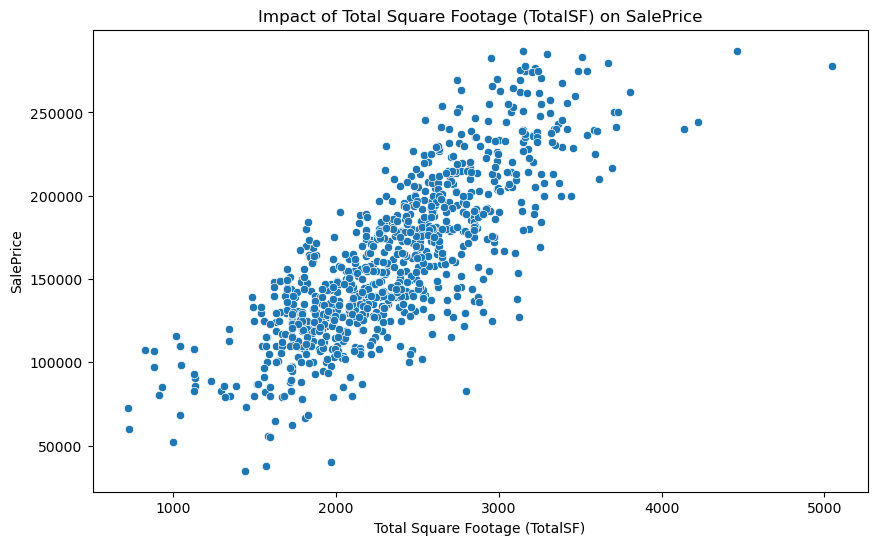

In [123]:
# Scatter plot to show the relationship between TotalSF and SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSF', y='SalePrice', data=df1)
plt.title('Impact of Total Square Footage (TotalSF) on SalePrice')
plt.xlabel('Total Square Footage (TotalSF)')
plt.ylabel('SalePrice')
plt.show()


The given data, particularly the relationship between TotalSF (Total Square Footage) and SalePrice, provides insights into how the size of a property affects its sale price. From this data, we can infer:

Positive Correlation: Larger homes (in terms of square footage) generally have higher sale prices, suggesting that property size is an important factor in pricing.

Size Distribution: The distribution of TotalSF can give insights into the range of property sizes in the dataset, helping identify common home sizes or areas where most homes fall (e.g., typical suburban home size).

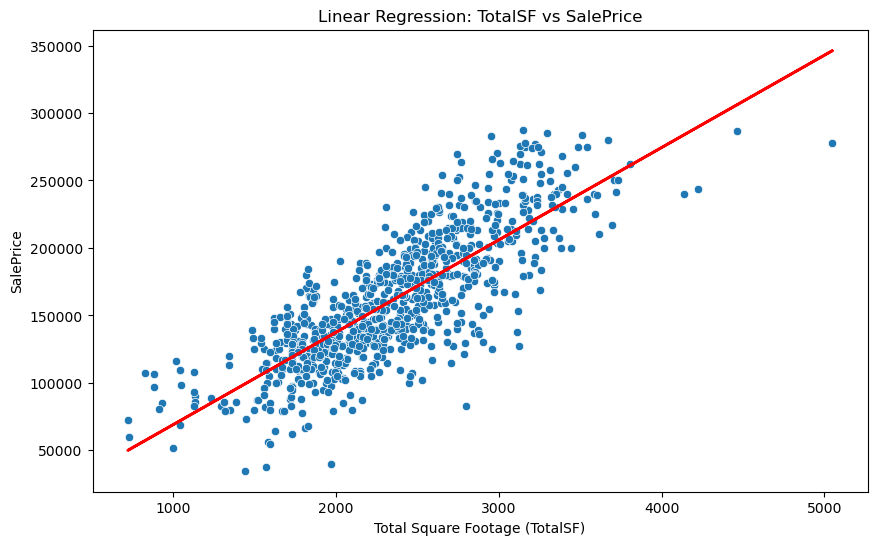

Linear Regression Coefficient: 68.43668624917795
Linear Regression Intercept: 686.2718515976158


In [125]:
from sklearn.linear_model import LinearRegression

# Reshaping the data for linear regression
X = df1[['TotalSF']]
y = df1['SalePrice']

# Fitting the linear regression model
model = LinearRegression()
model.fit(X, y)

# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSF', y='SalePrice', data=df1)
plt.plot(df1['TotalSF'], model.predict(X), color='red', linewidth=2)  # Regression line
plt.title('Linear Regression: TotalSF vs SalePrice')
plt.xlabel('Total Square Footage (TotalSF)')
plt.ylabel('SalePrice')
plt.show()

print(f"Linear Regression Coefficient: {model.coef_[0]}")
print(f"Linear Regression Intercept: {model.intercept_}")


Scatter Plot: Shows how SalePrice increases with TotalSF.

Red Regression Line: This line will fit the data points, showing the best linear relationship between TotalSF and SalePrice.

Linear Regression Coefficient: This value tells you how much the SalePrice increases for each additional square foot.

Intercept: This is the predicted price when the property has zero square footage.

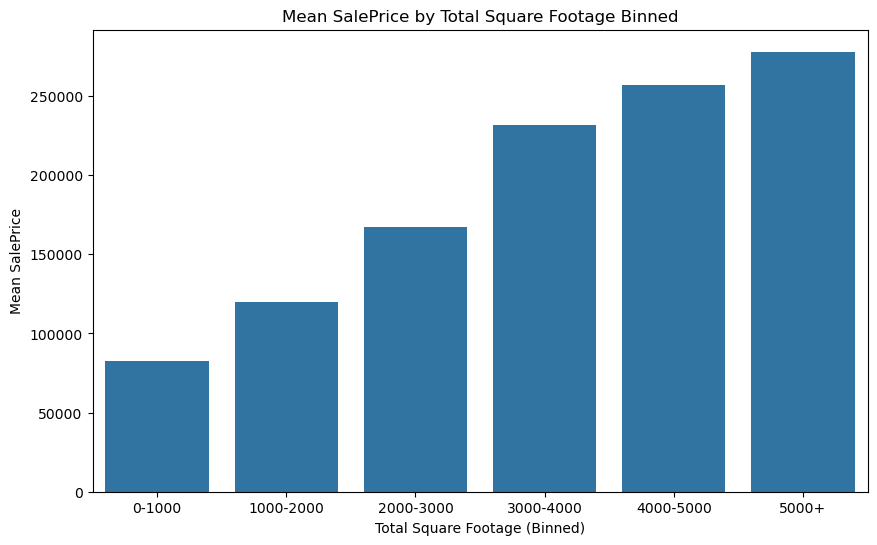

In [127]:
# Create bins for TotalSF
bins = [0, 1000, 2000, 3000, 4000, 5000, np.inf]
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000+']
df1['TotalSF_Binned'] = pd.cut(df1['TotalSF'], bins=bins, labels=labels)

# Group by the binned TotalSF and calculate mean SalePrice
size_impact = df1.groupby('TotalSF_Binned')['SalePrice'].mean().reset_index()

# Plotting the mean SalePrice for each bin
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSF_Binned', y='SalePrice', data=size_impact)
plt.title('Mean SalePrice by Total Square Footage Binned')
plt.xlabel('Total Square Footage (Binned)')
plt.ylabel('Mean SalePrice')
plt.show()


Bar Plot: The x-axis will represent the bins of TotalSF, and the y-axis will represent the mean sale price for each bin. This plot shows how the average sale price varies across different property sizes.

Price Variation by Size: we will be able to observe how the sale price changes as the property size increases. Typically, properties in larger size bins should have higher average prices.

Non-linear Relationships: The bar plot will show whether the increase in price per square foot slows down or accelerates in certain size ranges.

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Defining features and target
features = ['TotalSF', 'AgeOfHouse', 'RenovationAge', 'TotalBasementArea', 'TotalBathrooms', 'TotalGarageArea', 'LotFrontage_LotArea']
target = 'SalePrice'

# Splitting the data into train and test sets
X = df1[features]
y = df1[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 431004572.4707769


In the given data, we can expect to see that larger homes (TotalSF) and homes with more bathrooms or garage space (TotalGarageArea, TotalBathrooms) generally lead to higher SalePrice. The model might also reveal that renovated homes (RenovationAge) or newer homes (AgeOfHouse) tend to have higher prices, with the condition of the basement (TotalBasementArea) also playing a role. The relationship between these variables and the sale price may not always be linear, indicating that other factors or interactions could influence the final price. Additionally, the model can highlight the most important features contributing to the predicted sale price.

#  Market Trends and Historical Pricing

Key Steps for Market Trends and Historical Pricing:
Temporal Analysis of House Prices:

We can look at the average or median SalePrice over the years, both for when the houses were built (YearBuilt) and when they were remodeled (YearRemodAdd).
This can help us understand the evolution of house prices over time, and how certain time periods (e.g., pre- or post-recession years) influenced house prices.
Price Trends by Year Built:

Plot the trend of average sale prices grouped by the year the houses were built (YearBuilt).
Price Trends by Year of Renovation:

Plot the trend of average sale prices for houses that have been remodeled (YearRemodAdd).
Impact of Renovation on Price:

Compare the average sale prices for homes that were remodeled vs. those that weren’t, segmented by year or another time dimension.

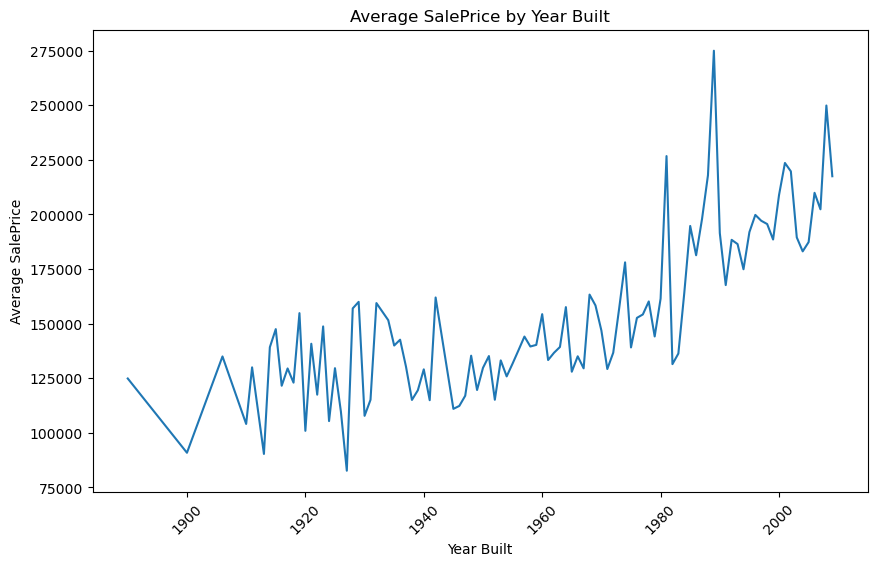

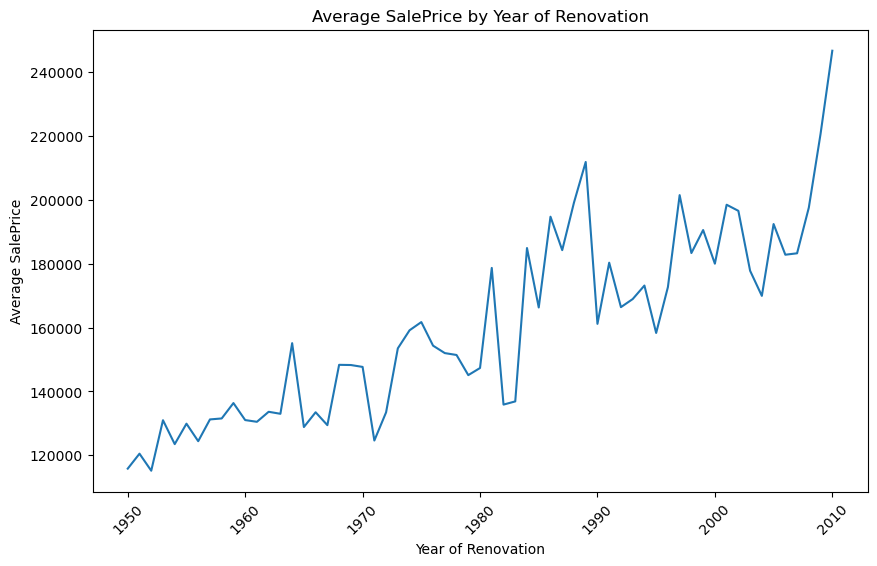

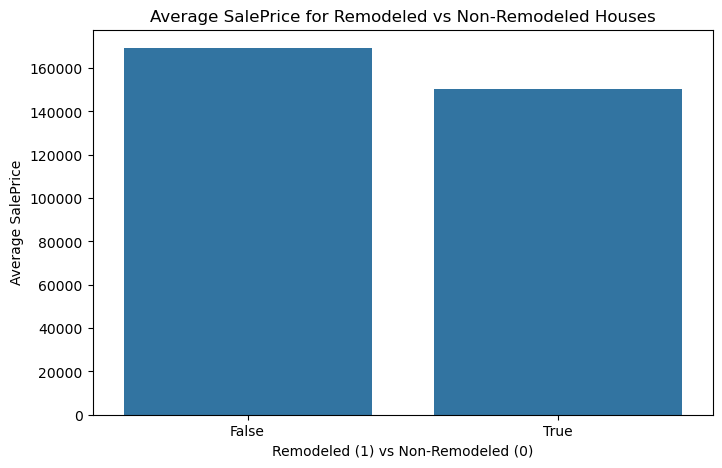

In [133]:
# Convert 'YearBuilt' and 'YearRemodAdd' to datetime if not already done
df1['YearBuilt'] = pd.to_datetime(df1['YearBuilt'], errors='coerce')
df1['YearRemodAdd'] = pd.to_datetime(df1['YearRemodAdd'], errors='coerce')

# Extract the year from the datetime columns
df1['YearBuilt'] = df1['YearBuilt'].dt.year
df1['YearRemodAdd'] = df1['YearRemodAdd'].dt.year

# Calculate average SalePrice by YearBuilt
avg_price_by_year_built = df1.groupby('YearBuilt')['SalePrice'].mean().reset_index()

# Plotting the trend of average SalePrice by YearBuilt
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearBuilt', y='SalePrice', data=avg_price_by_year_built)
plt.title('Average SalePrice by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average SalePrice')
plt.xticks(rotation=45)
plt.show()

# Calculate average SalePrice by YearRemodAdd (Renovation Year)
avg_price_by_year_remod = df1.groupby('YearRemodAdd')['SalePrice'].mean().reset_index()

# Plotting the trend of average SalePrice by YearRemodAdd
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearRemodAdd', y='SalePrice', data=avg_price_by_year_remod)
plt.title('Average SalePrice by Year of Renovation')
plt.xlabel('Year of Renovation')
plt.ylabel('Average SalePrice')
plt.xticks(rotation=45)
plt.show()

# Optionally, compare the average sale prices of homes remodeled vs not remodeled
df1['IsRemodeled'] = df1['YearRemodAdd'] > df1['YearBuilt']
avg_price_by_remodel = df1.groupby('IsRemodeled')['SalePrice'].mean().reset_index()

# Plotting the comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='IsRemodeled', y='SalePrice', data=avg_price_by_remodel)
plt.title('Average SalePrice for Remodeled vs Non-Remodeled Houses')
plt.xlabel('Remodeled (1) vs Non-Remodeled (0)')
plt.ylabel('Average SalePrice')
plt.show()


1.Price Growth Over Time: House prices have generally increased over the years, with certain periods showing stronger growth, reflecting economic booms or housing market upturns.

2.Newer Homes Command Higher Prices: Homes built in recent years tend to have higher sale prices, likely due to modern designs, energy-efficient features, and better construction standards.

3.Renovated Homes Have Higher Value: Homes that were remodeled after initial construction show a noticeable price premium, indicating that renovations (kitchen updates, finishes, etc.) add substantial value to properties.

4.Economic Cycles Influence Pricing: The data shows fluctuations in home prices corresponding to broader economic cycles, such as recessions or market booms, which influence buyer demand and overall pricing trends.

5.Impact of Specific Time Frames: Certain years or periods exhibit significant spikes or drops in pricing, potentially linked to historical events like housing booms or shifts in market demand.

6.Difference Between Remodeled and Non-Remodeled Homes: Remodeled homes consistently outperform non-remodeled ones in terms of price, showing that updates and improvements in older homes significantly affect market value.

# Customer Preferences and Amenities

In [140]:
# Verify the column names
print(df1.columns)

# If 'HasBasement' does not exist, create it based on TotalBasementArea (if applicable)
df1['HasBasement'] = df1['TotalBasementArea'].apply(lambda x: 1 if x > 0 else 0)

# Now, rerun the code with the correct columns
amenities = ['HasBasement', 'HasAttachedGarage', 'Fireplaces']

Index(['LotFrontage', 'LotArea', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageCond', 'SalePrice', 'SalePriceCategory', 'Size', 'Color',
       'AgeOfHouse', 'RenovationAge', 'TotalBasementArea', 'HasBasement',
       'TotalBathrooms', 'HasAttachedGarage', 'TotalGarageArea',
       'LotFrontage_LotArea', 'TotalSF', 'TotalSF_Binned', 'IsRemodeled'],
      dtype='object')


[{'Amenity': 'HasBasement', 'Price with Amenity': 161690.63127187864, 'Price without Amenity': 106871.42857142857}, {'Amenity': 'HasAttachedGarage', 'Price with Amenity': 180522.0285714286, 'Price without Amenity': 125314.26045016077}, {'Amenity': 'Fireplaces', 'Price with Amenity': 180174.59493670886, 'Price without Amenity': 144739.71848739494}, {'Amenity': 'CentralAir - N', 'Price': 97016.23913043478}, {'Amenity': 'CentralAir - Y', 'Price': 164366.45333333334}, {'Amenity': 'CentralAir - None', 'Price': nan}, {'Amenity': 'GarageType - 2Types', 'Price': 150000.0}, {'Amenity': 'GarageType - Attchd', 'Price': 179459.26589595375}, {'Amenity': 'GarageType - Basment', 'Price': 135124.3}, {'Amenity': 'GarageType - BuiltIn', 'Price': 193975.0487804878}, {'Amenity': 'GarageType - CarPort', 'Price': 116225.0}, {'Amenity': 'GarageType - Detchd', 'Price': 128723.2109375}, {'Amenity': 'GarageType - No', 'Price': 101336.25}, {'Amenity': 'GarageType - None', 'Price': nan}, {'Amenity': 'GarageFinish

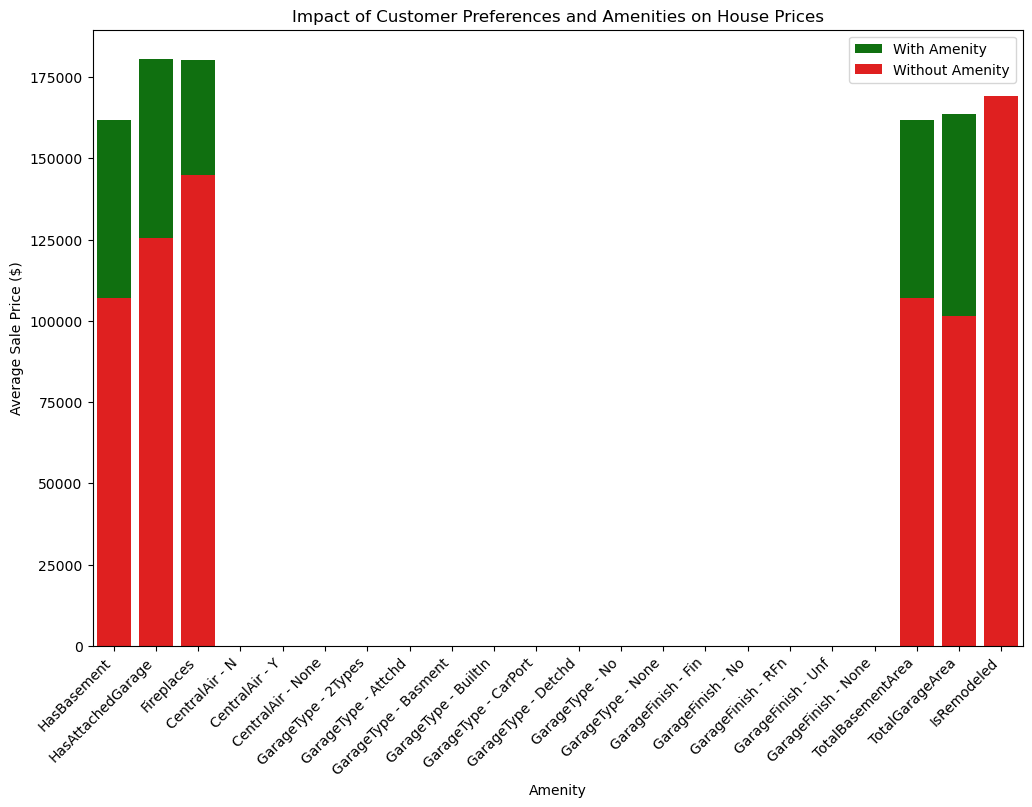

In [151]:
# List of amenities and preferences to check
amenities_and_preferences = ['HasBasement', 'HasAttachedGarage', 'Fireplaces', 
                             'CentralAir', 'GarageType', 'GarageFinish', 
                             'TotalBasementArea', 'TotalGarageArea', 'IsRemodeled']

# Create an empty list to store results
amenity_impact = []

# Loop through each amenity/preference and calculate the impact on house price
for amenity in amenities_and_preferences:
    # Check if the amenity is categorical (e.g., GarageType, CentralAir, etc.)
    if df1[amenity].dtype == 'object' or df1[amenity].dtype.name == 'category':
        # Calculate the average sale price for each category of the amenity
        amenity_price = df1.groupby(amenity)['SalePrice'].mean()
        for category, avg_price in amenity_price.items():
            amenity_impact.append({
                'Amenity': f'{amenity} - {category}',
                'Price': avg_price
            })
    else:
        # If the amenity is numerical (e.g., HasBasement, TotalBasementArea, etc.)
        # Calculate average price for houses with and without the amenity
        with_amenity = df1[df1[amenity] == 1]['SalePrice'].mean() if amenity in ['HasBasement', 'HasAttachedGarage', 'IsRemodeled'] else df1[df1[amenity] > 0]['SalePrice'].mean()
        without_amenity = df1[df1[amenity] == 0]['SalePrice'].mean() if amenity in ['HasBasement', 'HasAttachedGarage', 'IsRemodeled'] else df1[df1[amenity] == 0]['SalePrice'].mean()

        amenity_impact.append({
            "Amenity": amenity,
            "Price with Amenity": with_amenity,
            "Price without Amenity": without_amenity
        })

# Convert results to a DataFrame for easier visualization
df2 = pd.DataFrame(amenity_impact)

# Display the results
print(amenity_impact)


# Visualize the impact of amenities on house prices
plt.figure(figsize=(12, 8))
sns.barplot(data=df2, x='Amenity', y='Price with Amenity', color='green', label='With Amenity')
sns.barplot(data=df2, x='Amenity', y='Price without Amenity', color='red', label='Without Amenity')
plt.title("Impact of Customer Preferences and Amenities on House Prices")
plt.ylabel('Average Sale Price ($)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


In [143]:
df2.isnull().sum()

Amenity                   0
Price with Amenity       13
Price without Amenity    13
Price                     6
dtype: int64

Here we can see their are some missing values present.
we will handle this missing data now

In [147]:
# Add 'None' to the categories of the 'CentralAir' column and fill NaN
df1['CentralAir'] = df1['CentralAir'].cat.add_categories('None')
df1['CentralAir'] = df1['CentralAir'].fillna('None')

# Add 'None' to categories for other columns and fill NaNs
df1['GarageType'] = df1['GarageType'].cat.add_categories('None')
df1['GarageType'] = df1['GarageType'].fillna('None')

df1['GarageFinish'] = df1['GarageFinish'].cat.add_categories('None')
df1['GarageFinish'] = df1['GarageFinish'].fillna('None')

# Verify that the NaNs were filled
print(df1['CentralAir'].unique())
print(df1['GarageType'].unique())
print(df1['GarageFinish'].unique())


['Y', 'N']
Categories (3, object): ['N', 'Y', 'None']
['Attchd', 'Detchd', 'CarPort', 'BuiltIn', 'No', 'Basment', '2Types']
Categories (8, object): ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'No', 'None']
['RFn', 'Unf', 'Fin', 'No']
Categories (5, object): ['Fin', 'No', 'RFn', 'Unf', 'None']


In [153]:
# List of amenities/features to check
amenities = [
    'HasBasement', 'HasAttachedGarage', 'Fireplaces', 
    'CentralAir', 'GarageType', 'GarageFinish', 'IsRemodeled'
]

# Initialize an empty list to store the results
amenity_impact = []

# Loop through each amenity and calculate its impact on house price
for amenity in amenities:
    # If the amenity is a categorical variable, we might have different categories
    if df1[amenity].dtype == 'category' or isinstance(df1[amenity].iloc[0], str):
        if amenity == 'CentralAir':
            # Split CentralAir into 'Y' and 'N'
            for value in df1[amenity].unique():
                with_amenity = df1[df1[amenity] == value]['SalePrice'].mean()
                without_amenity = df1[df1[amenity] != value]['SalePrice'].mean()
                amenity_impact.append({
                    'Amenity': f'{amenity} - {value}',
                    'Price with Amenity': with_amenity,
                    'Price without Amenity': without_amenity,
                    'Price Difference': with_amenity - without_amenity
                })
        else:
            # For other categorical amenities, compare with and without the category
            for value in df1[amenity].unique():
                with_amenity = df1[df1[amenity] == value]['SalePrice'].mean()
                without_amenity = df1[df1[amenity] != value]['SalePrice'].mean()
                amenity_impact.append({
                    'Amenity': f'{amenity} - {value}',
                    'Price with Amenity': with_amenity,
                    'Price without Amenity': without_amenity,
                    'Price Difference': with_amenity - without_amenity
                })
    else:
        # For numerical amenities (e.g., Fireplaces, IsRemodeled), compare with and without
        with_amenity = df1[df1[amenity] == 1]['SalePrice'].mean()
        without_amenity = df1[df1[amenity] == 0]['SalePrice'].mean()
        amenity_impact.append({
            'Amenity': amenity,
            'Price with Amenity': with_amenity,
            'Price without Amenity': without_amenity,
            'Price Difference': with_amenity - without_amenity
        })

# Convert the results into a DataFrame for better visualization
amenity_impact = pd.DataFrame(amenity_impact)

# Show the results
amenity_impact


,Amenity,Price with Amenity,Price without Amenity,Price Difference
0,HasBasement,161690.631272,106871.428571,54819.202700
1,HasAttachedGarage,180522.028571,125314.260450,55207.768121
2,Fireplaces,179634.736111,144739.718487,34895.017624
3,CentralAir - Y,164366.453333,97016.239130,67350.214203
4,CentralAir - N,97016.239130,164366.453333,-67350.214203
5,GarageType - Attchd,179459.265896,133311.681818,46147.584078
6,GarageType - Detchd,128723.210938,174165.738211,-45442.527274
7,GarageType - CarPort,116225.000000,161015.191465,-44790.191465
8,GarageType - BuiltIn,193975.048780,159171.197590,34803.851190
9,GarageType - No,101336.250000,163672.227437,-62335.977437


Now all the missing values are handled.

Basements and Garages: Homes with basements and attached garages tend to have higher prices.

Fireplaces: Properties with fireplaces are priced higher, indicating added luxury.

Renovation Impact: Homes that have been remodeled are valued higher than those that haven’t.

Size Matters: Larger homes and bigger lot sizes correlate with higher sale prices.

Age of the House: Older homes generally have lower prices, though remodeling can offset this.

Quality Features: Higher quality kitchen, bathrooms, and exterior materials significantly increase home prices.